<center><font color='Green' size='20'>Proyecto de Ciencia de Datos</font></center>

In [293]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import contextily as cx
import scipy.stats as sp
import pingouin as pg
import folium
import branca
from pyproj import Transformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.cluster import KMeans

In [2]:
df_floods = gpd.read_file(
    '../Data/inundaciones/Z_SUSCEP_INUNDACION_2015.shp'
)

c:\Users\luisr\anaconda3\envs\conda_is_love\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [3]:
df_floods = df_floods[(df_floods['susce_inun'] == 'ALTA') | (df_floods['susce_inun'] == 'MEDIA') | (df_floods['susce_inun'] == 'BAJA') | (df_floods['susce_inun'] == 'SIN SUSCEPTIBILIDAD')]

In [4]:
df_cantones = gpd.read_file(
    '../Data/cantones-ecuador.geojson'
)

In [5]:
df_sede = pd.read_excel(
    '../Data/ICD/SBACcatalogo2020.xlsx',
    sheet_name='Sedes Sbac19'
)

In [6]:
df_sede = df_sede.loc[:, ['sede', 'nam', 'lat', 'long']]

In [7]:
df_test_16 = pd.read_csv(
    '../Data/ICD/RegistroMicro16_17.csv',
    sep=';',
    na_values=['999999']
)

C:\Users\luisr\AppData\Local\Temp\ipykernel_40852\3793740382.py:1: DtypeWarning: Columns (2,22,24,25,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  df_test_16 = pd.read_csv(


In [8]:
df_test_17 = pd.read_csv(
    '../Data/ICD/RegistroMicro17_18.csv',
    sep=';',
    na_values=['999999']
)

C:\Users\luisr\AppData\Local\Temp\ipykernel_40852\1838864012.py:1: DtypeWarning: Columns (2,22,24,25,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  df_test_17 = pd.read_csv(


In [9]:
df_test_18 = pd.read_csv(
    '../Data/ICD/RegistroMicro18_19.csv',
    sep=';',
    na_values=['999999']
)

C:\Users\luisr\AppData\Local\Temp\ipykernel_40852\1550021852.py:1: DtypeWarning: Columns (2,22,24,25,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  df_test_18 = pd.read_csv(


In [10]:
df_registers_16 = pd.read_csv(
    '../Data/ICD/RegistrosAdministrativos_2016-2017_inicio.csv',
    sep=';',
)

In [11]:
df_registers_17 = pd.read_csv(
    '../Data/ICD/RegistrosAdministrativos_2017-2018_inicio.csv',
    sep=';'
)

In [12]:
df_registers_18 = pd.read_csv(
    '../Data/ICD/RegistrosAdministrativos_2018-2019_inicio.csv',
    sep=';'
)

In [13]:
df_registers_16_end = pd.read_csv(
    '../Data/ICD/RegistrosAdministrativos_2016-2017_Fin.csv',
    sep=';'
)

In [14]:
df_registers_17_end = pd.read_csv(
    '../Data/ICD/RegistrosAdministrativos_2017-2018_Fin.csv',
    sep=';'
)

In [15]:
df_registers_18_end = pd.read_csv(
    '../Data/ICD/RegistrosAdministrativos_2018-2019_Fin.csv',
    sep=';'
)

In [16]:
df_students_16 = pd.read_csv(
    '../Data/ICD/RegistroEstudiantes16_17.csv',
    sep=';',
    na_values=['999999'],
)

In [17]:
df_students_17 = pd.read_csv(
    '../Data/ICD/RegistroEstudiantes17_18.csv',
    sep=';',
    na_values=['999999'],
)

In [18]:
df_students_18 = pd.read_csv(
    '../Data/ICD/RegistroEstudiantes18_19.csv',
    sep=';',
    na_values=['999999'],
)

In [19]:
df_school_code = pd.read_excel(
    '../Data/ICD/MaestraInstituciones.xlsx'
)

In [159]:
df_eficiencia = pd.read_excel(
    '../Data/eficiencia.xlsx'
)

In [20]:
def addString(arr, string):
    arr_r = []
    for i in range(17):
        arr_r.append(arr[i])

    for i in range(17, len(arr)):
        arr_r.append(arr[i] + string)
    return arr_r

In [21]:
prueba3 = df_school_code.merge(df_sede, left_on='amie', right_on='sede')

<font color='green' size='15'>Periodo 2016-2017</font>

In [22]:
new_columns = addString(df_registers_16_end.columns, '_fin')

In [23]:
df_registers_16_end.columns = new_columns

In [24]:
df_registers_16_end.drop(columns=['Periodo', 'Zona', 'Cod_Provincia', 'Cod_Canton', 'Cod_Parroquia', 'Escolarizacion', 'Tipo_Educacion', 'Nivel_Educacion', 'Sostenimiento', 'Area', 'Regimen_Escolar', 'Jurisdiccion', 'Modallidad', 'Jornada', 'Tenencia_Inmueble_Edificio', 'Acceso_Edificio'], inplace=True)

In [25]:
df_registers_16 = df_registers_16.merge(df_registers_16_end, on=['Codigo_Institucion', ])

In [26]:
df_registers_16['Periodo'] = df_registers_16['Periodo'].str.strip(' Inicio')

In [27]:
df_test_16['repetidor'] = df_test_16['amie'].isnull() & df_test_16['inev'].isnull() & df_test_16['pes'].notnull()

In [28]:
#df_test_16 = df_test_16[df_test_16['amie'].notnull() | (df_test_16['repetidor'] == True)]

In [29]:
df_test_16['amie'] = df_test_16['amie'].fillna('999999')

In [30]:
prueba1 = df_test_16.merge(prueba3, left_on='amie', right_on='amie', how='left')

In [31]:
prueba1.drop(columns=['nam', 'sede'], inplace=True)

In [32]:
prueba1 = prueba1[~((prueba1['amie'] != '999999') & prueba1['lat'].isnull())]

In [33]:
df_students_16.drop(columns=['ciclo', 'amie', 'estado', 'poblacion', 'es_regeva'], inplace=True)

In [34]:
prueba2 = prueba1.merge(df_students_16, left_on='codigo', right_on='codigo')

In [35]:
gdf_amie_16 = prueba2[prueba2['amie'] != '999999']

In [36]:
trans = Transformer.from_crs(
    "EPSG:4326",
    "EPSG:32717",
    always_xy=True,
)
xx, yy = trans.transform(gdf_amie_16["long"].values, gdf_amie_16["lat"].values)
gdf_amie_16["X"] = xx
gdf_amie_16["Y"] = yy

C:\Users\luisr\AppData\Local\Temp\ipykernel_40852\2436929511.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf_amie_16["X"] = xx
C:\Users\luisr\AppData\Local\Temp\ipykernel_40852\2436929511.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf_amie_16["Y"] = yy


In [37]:
gdf_amie_16 = gpd.GeoDataFrame(gdf_amie_16, geometry=gpd.points_from_xy(gdf_amie_16['X'], gdf_amie_16['Y']))

c:\Users\luisr\anaconda3\envs\conda_is_love\lib\site-packages\geopandas\array.py:275: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return GeometryArray(vectorized.points_from_xy(x, y, z), crs=crs)


In [38]:
gdf_amie_16.crs = df_floods.crs

In [39]:
df_join_16 = gpd.sjoin(df_floods, gdf_amie_16, how='inner', op='intersects')

Text(0, 0.5, 'Latitud')

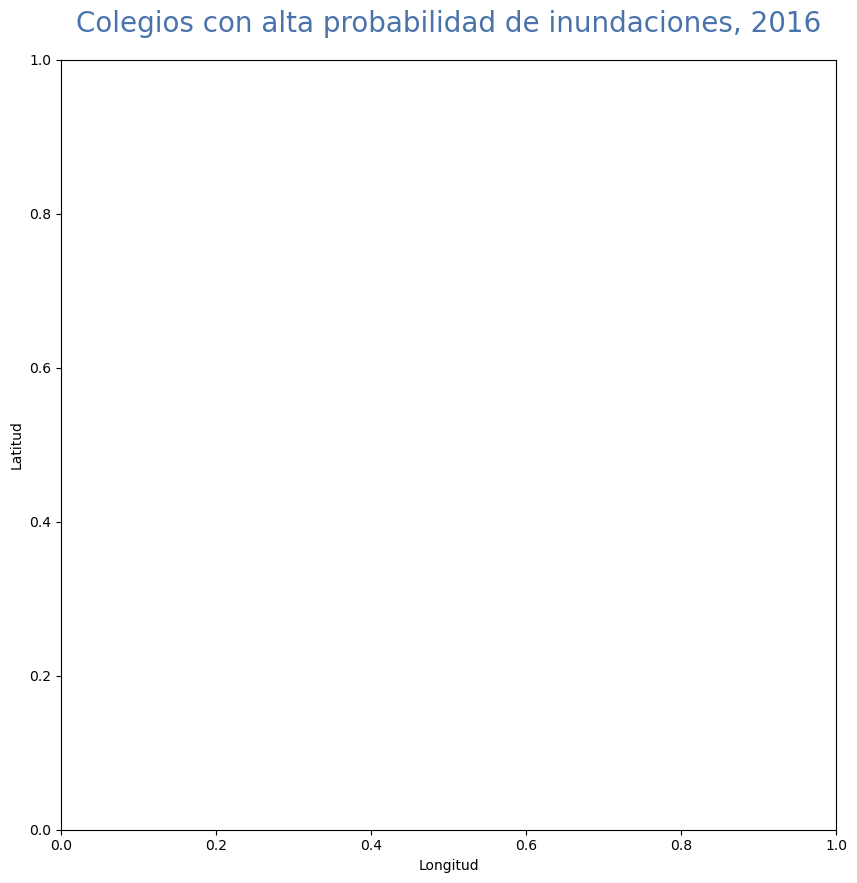

In [40]:
# Control del tamaño de la figura del mapa
fig, ax =plt.subplots(figsize=(10, 10))

# Control del título y los ejes
ax.set_title('Colegios con alta probabilidad de inundaciones, 2016', 

             pad =20, 

             fontdict={'fontsize':20, 'color': '#4873ab'})

ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

# Mostrar el mapa finalizado
#df_join_16.plot(column='inev', cmap='plasma', ax=ax, zorder=5)

<font color='green' size='15'>Periodo 2017-2018</font>

In [41]:
new_columns = addString(df_registers_17_end.columns, '_fin')

In [42]:
df_registers_17_end.columns = new_columns

In [43]:
df_registers_17_end.drop(columns=['Periodo', 'Zona', 'Cod_Provincia', 'Cod_Canton', 'Cod_Parroquia', 'Escolarizacion', 'Tipo_Educacion', 'Nivel_Educacion', 'Sostenimiento', 'Area', 'Regimen_Escolar', 'Jurisdiccion', 'Modallidad', 'Jornada', 'Tenencia_Inmueble_Edificio', 'Acceso_Edificio'], inplace=True)

In [44]:
df_registers_17 = df_registers_17.merge(df_registers_17_end, on=['Codigo_Institucion', ])

In [45]:
df_registers_17[(df_registers_17['Total_Docentes'] - df_registers_17['Total_Docentes_fin']) > 0].shape

(1752, 299)

In [46]:
df_registers_17['Periodo'] = df_registers_17['Periodo'].str.strip(' Inicio')

In [47]:
df_test_17['repetidor'] = df_test_17['amie'].isnull() & df_test_17['inev'].isnull() & df_test_17['pes'].notnull()

In [48]:
#df_test_17 = df_test_17[df_test_17['amie'].notnull() | (df_test_17['repetidor'] == True)]

In [49]:
df_test_17['amie'] = df_test_17['amie'].fillna('999999')

In [50]:
prueba4 = df_test_17.merge(prueba3, left_on='amie', right_on='amie', how='left')

In [51]:
prueba4.drop(columns=['nam', 'sede'], inplace=True)

In [52]:
prueba4 = prueba4[~((prueba4['amie'] != '999999') & prueba4['lat'].isnull())]

In [53]:
df_students_17.drop(columns=['ciclo', 'amie', 'estado', 'poblacion', 'es_regeva'], inplace=True)

In [54]:
prueba5 = prueba4.merge(df_students_17, left_on='codigo', right_on='codigo')

In [55]:
gdf_amie = prueba5[prueba5['amie'] != '999999']

In [56]:
trans = Transformer.from_crs(
    "EPSG:4326",
    "EPSG:32717",
    always_xy=True,
)
xx, yy = trans.transform(gdf_amie["long"].values, gdf_amie["lat"].values)
gdf_amie["X"] = xx
gdf_amie["Y"] = yy

C:\Users\luisr\AppData\Local\Temp\ipykernel_40852\3555622748.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf_amie["X"] = xx
C:\Users\luisr\AppData\Local\Temp\ipykernel_40852\3555622748.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf_amie["Y"] = yy


In [57]:
gdf_amie = gpd.GeoDataFrame(gdf_amie, geometry=gpd.points_from_xy(gdf_amie['X'], gdf_amie['Y']))

c:\Users\luisr\anaconda3\envs\conda_is_love\lib\site-packages\geopandas\array.py:275: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return GeometryArray(vectorized.points_from_xy(x, y, z), crs=crs)


In [58]:
gdf_amie.crs = df_floods.crs

In [59]:
df_join = gpd.sjoin(df_floods, gdf_amie, how='inner', op='intersects')

Text(0, 0.5, 'Latitud')

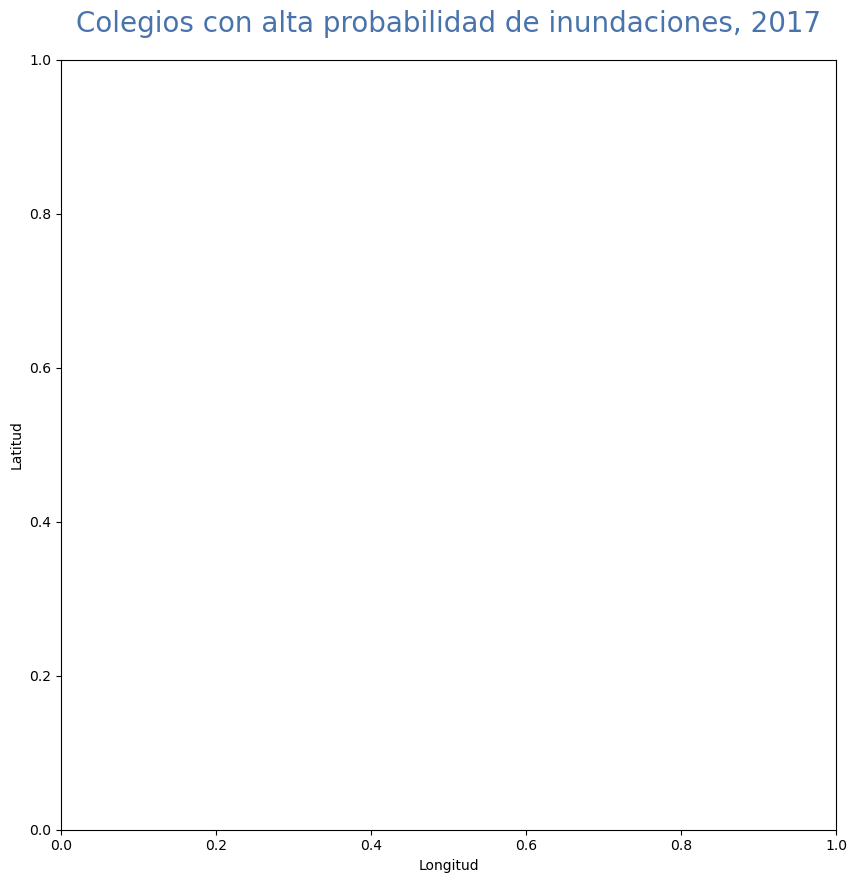

In [60]:
# Control del tamaño de la figura del mapa
fig, ax =plt.subplots(figsize=(10, 10))

# Control del título y los ejes
ax.set_title('Colegios con alta probabilidad de inundaciones, 2017', 

             pad =20, 

             fontdict={'fontsize':20, 'color': '#4873ab'})

ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

# Mostrar el mapa finalizado
#df_join.plot(column='inev', cmap='plasma', ax=ax, zorder=5)

wgso84
capa con folium

<font color='green' size='15'>Periodo 2018-2019</font>

In [61]:
new_columns = addString(df_registers_18_end.columns, '_fin')

In [62]:
df_registers_18_end.columns = new_columns

In [63]:
df_registers_18_end.drop(columns=['Periodo', 'Zona', 'Cod_Provincia', 'Cod_Canton', 'Cod_Parroquia', 'Escolarizacion', 'Tipo_Educacion', 'Nivel_Educacion', 'Sostenimiento', 'Area', 'Regimen_Escolar', 'Jurisdiccion', 'Jornada', 'Tenencia_Inmueble_Edificio', 'Acceso_Edificio'], inplace=True)

In [64]:
df_registers_18 = df_registers_18.merge(df_registers_18_end, on=['Codigo_Institucion', ])

In [65]:
df_registers_18['Periodo'] = df_registers_18['Periodo'].str.strip(' Inicio')

In [66]:
df_test_18['repetidor'] = df_test_18['amie'].isnull() & df_test_18['inev'].isnull() & df_test_18['pes'].notnull()

In [67]:
#df_test_18 = df_test_18[df_test_18['amie'].notnull() | (df_test_18['repetidor'] == True)]

In [68]:
df_test_18['amie'] = df_test_18['amie'].fillna('999999')

In [69]:
prueba6 = df_test_18.merge(prueba3, left_on='amie', right_on='amie', how='left')

In [70]:
prueba6.drop(columns=['nam', 'sede'], inplace=True)

In [71]:
prueba6 = prueba6[~((prueba6['amie'] != '999999') & prueba6['lat'].isnull())]

In [72]:
df_students_18.drop(columns=['ciclo', 'amie', 'estado', 'poblacion', 'es_regeva'], inplace=True)

In [73]:
prueba7 = prueba6.merge(df_students_18, left_on='codigo', right_on='codigo')

In [74]:
gdf_amie_18 = prueba7[prueba7['amie'] != '999999']

In [75]:
trans = Transformer.from_crs(
    "EPSG:4326",
    "EPSG:32717",
    always_xy=True,
)
xx, yy = trans.transform(gdf_amie_18["long"].values, gdf_amie_18["lat"].values)
gdf_amie_18["X"] = xx
gdf_amie_18["Y"] = yy

C:\Users\luisr\AppData\Local\Temp\ipykernel_40852\783028434.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf_amie_18["X"] = xx
C:\Users\luisr\AppData\Local\Temp\ipykernel_40852\783028434.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf_amie_18["Y"] = yy


In [76]:
gdf_amie_18 = gpd.GeoDataFrame(gdf_amie_18, geometry=gpd.points_from_xy(gdf_amie_18['X'], gdf_amie_18['Y']))

c:\Users\luisr\anaconda3\envs\conda_is_love\lib\site-packages\geopandas\array.py:275: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return GeometryArray(vectorized.points_from_xy(x, y, z), crs=crs)


In [77]:
gdf_amie_18.crs = df_floods.crs

In [78]:
df_join_18 = gpd.sjoin(df_floods, gdf_amie_18, how='inner', op='intersects')

In [79]:
dfht_join_18 = df_join_18.loc[:, ['geometry', 'inev', 'pes']]

Text(0, 0.5, 'Latitud')

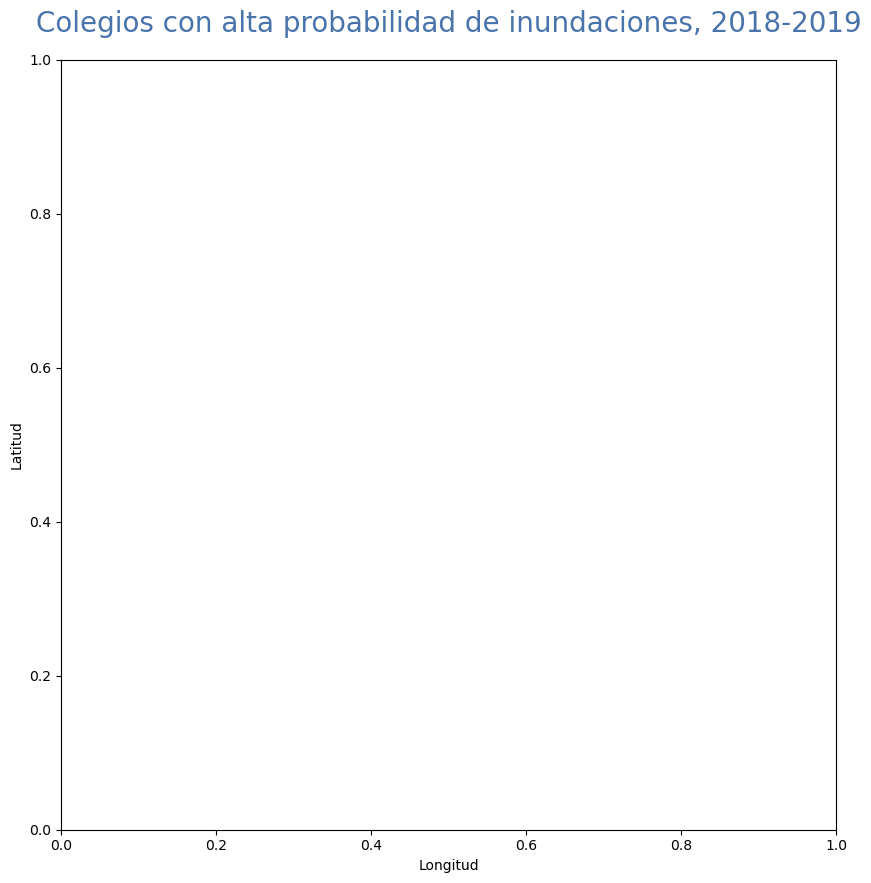

In [80]:
# Control del tamaño de la figura del mapa
fig, ax =plt.subplots(figsize=(10, 10))

# Control del título y los ejes
ax.set_title('Colegios con alta probabilidad de inundaciones, 2018-2019', 

             pad =20, 

             fontdict={'fontsize':20, 'color': '#4873ab'})

ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

# Mostrar el mapa finalizado
#dfht_join_18.plot(column='inev', cmap='plasma', ax=ax, zorder=5)

In [81]:
#gdf_amie_18 = gdf_amie_18[gdf_amie_18['pes'] >= 400]

In [82]:
#ax = df_join_18.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
#cx.add_basemap(ax, crs=df_join_18.crs)

In [83]:
df_general = pd.concat([gdf_amie_16, gdf_amie, gdf_amie_18])

In [84]:
df_general.shape

(875948, 369)

In [85]:
df_outliers = df_general[df_general['pes'] >= 400]

In [86]:
df_mean = pd.pivot_table(data=df_outliers, index='amie', columns='diskabe', values='pes', aggfunc=np.mean)

In [87]:
df_mean.dropna(inplace=True)

In [88]:
df_mean['diferencia'] = df_mean[2.0] - df_mean[1.0]

In [89]:
df_mean = df_mean.sort_values(by='diferencia', ascending=False)

In [90]:
df_general_nulls = df_general[(df_general['amie'] != '999999') | (df_general['pes'].notnull())]

In [91]:
df_mean = pd.pivot_table(data=df_outliers, index='amie', columns='diskabe', values='pes', aggfunc=np.mean)

In [92]:
df_mean.dropna(inplace=True)

In [93]:
df_mean['diferencia'] = df_mean[2.0] - df_mean[1.0]

In [94]:
df_mean = df_mean.sort_values(by='diferencia', ascending=False)

In [95]:
df_capacity = df_mean.drop(columns=['diferencia'])

In [96]:
df_difference = df_mean.drop(columns=[1.0, 2.0]).sort_values(by='diferencia', ascending=False)

In [97]:
sp.ttest_ind(df_mean[2.0], df_mean[1.0], equal_var=False, alternative='two-sided')

Ttest_indResult(statistic=2.954695774035153, pvalue=0.003147476176583428)

In [98]:
df_1 = df_outliers.loc[:, 'pes'][df_outliers['diskabe'] == 1.0]
df_2 = df_outliers.loc[:, 'pes'][df_outliers['diskabe'] == 2.0]

In [99]:
df_1.dropna(inplace=True)
df_2.dropna(inplace=True)

In [100]:
sp.ttest_ind(df_1, df_2, equal_var=False, alternative='two-sided')

Ttest_indResult(statistic=-1.5301428933993526, pvalue=0.12601802388602654)

In [101]:
df_mean_16 = gdf_amie_16[gdf_amie_16['pes'] >= 400]
df_mean_17 = gdf_amie[gdf_amie['pes'] >= 400]
df_mean_18 = gdf_amie_18[gdf_amie_18['pes'] >= 400]

In [102]:
df_mean_16 = pd.pivot_table(data=df_mean_16, index='amie', columns='diskabe', values='pes', aggfunc=np.mean)
df_mean_17 = pd.pivot_table(data=df_mean_17, index='amie', columns='diskabe', values='pes', aggfunc=np.mean)
df_mean_18 = pd.pivot_table(data=df_mean_18, index='amie', columns='diskabe', values='pes', aggfunc=np.mean)

In [103]:
df_mean_16.dropna(inplace=True)
df_mean_17.dropna(inplace=True)
df_mean_18.dropna(inplace=True)

In [104]:
df_mean_16['diferencia'] = df_mean_16[2.0] - df_mean_16[1.0]
df_mean_17['diferencia'] = df_mean_17[2.0] - df_mean_17[1.0]
df_mean_18['diferencia'] = df_mean_18[2.0] - df_mean_18[1.0]

In [105]:
df_capacity_16 = df_mean_16.drop(columns=['diferencia'])
df_capacity_17 = df_mean_17.drop(columns=['diferencia'])
df_capacity_18 = df_mean_18.drop(columns=['diferencia'])

In [106]:
df_difference_16 = df_mean_16.drop(columns=[1.0, 2.0]).sort_values(by='diferencia', ascending=False)
df_difference_17 = df_mean_17.drop(columns=[1.0, 2.0]).sort_values(by='diferencia', ascending=False)
df_difference_18 = df_mean_18.drop(columns=[1.0, 2.0]).sort_values(by='diferencia', ascending=False)

Text(0.5, 0.98, 'Diferencia de las notas entre estudiantes con discapacidad y sin discapacidad')

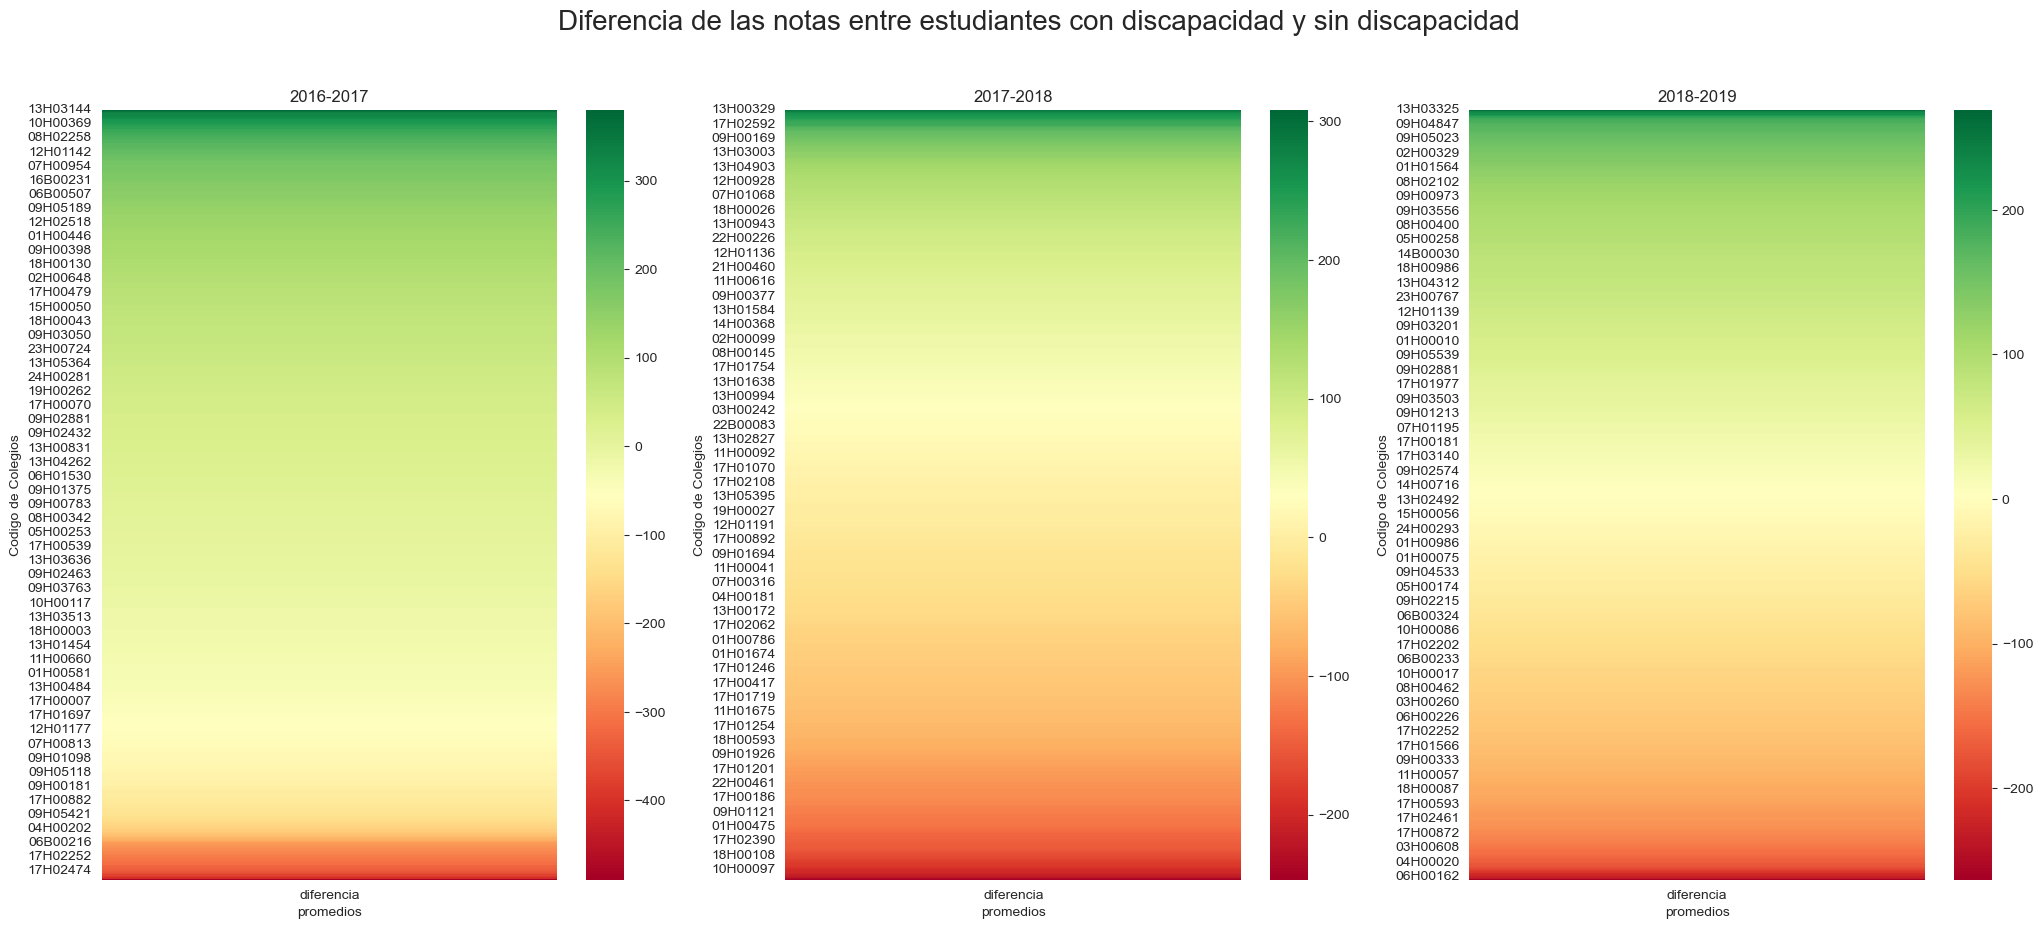

In [107]:
sns.set_style('darkgrid')
fig,axs = plt.subplots(1, 3, figsize=(25, 10))
sns.heatmap(df_difference_16, ax=axs[0], cmap='RdYlGn')
sns.heatmap(df_difference_17, ax=axs[1], cmap='RdYlGn')
sns.heatmap(df_difference_18, ax=axs[2], cmap='RdYlGn')
axs[0].set_title('2016-2017')
axs[1].set_title('2017-2018')
axs[2].set_title('2018-2019')
axs[0].set_ylabel('Codigo de Colegios')
axs[0].set_xlabel('promedios')
axs[1].set_ylabel('Codigo de Colegios')
axs[1].set_xlabel('promedios')
axs[2].set_ylabel('Codigo de Colegios')
axs[2].set_xlabel('promedios')
plt.suptitle('Diferencia de las notas entre estudiantes con discapacidad y sin discapacidad', fontsize=20)

In [108]:
sp.ttest_ind(df_mean_16[2.0], df_mean_16[1.0], equal_var=False, alternative='greater')

Ttest_indResult(statistic=4.127263427576152, pvalue=1.9088071305232875e-05)

In [109]:
sp.ttest_ind(df_mean_17[2.0], df_mean_17[1.0], equal_var=False, alternative='less')

Ttest_indResult(statistic=2.2144724940840943, pvalue=0.9865528961041492)

In [110]:
sp.ttest_ind(df_mean_18[2.0], df_mean_18[1.0], equal_var=False, alternative='two-sided')

Ttest_indResult(statistic=1.0306331484882638, pvalue=0.30280380982770355)

In [111]:
df_quintil_16 = gdf_amie_16.groupby('quintil').mean().reset_index(drop=False)
df_quintil_17 = gdf_amie.groupby('quintil').mean().reset_index(drop=False)
df_quintil_18 = gdf_amie_18.groupby('quintil').mean().reset_index(drop=False)

C:\Users\luisr\AppData\Local\Temp\ipykernel_40852\1859791675.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_quintil_16 = gdf_amie_16.groupby('quintil').mean().reset_index(drop=False)
C:\Users\luisr\AppData\Local\Temp\ipykernel_40852\1859791675.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_quintil_17 = gdf_amie.groupby('quintil').mean().reset_index(drop=False)
C:\Users\luisr\AppData\Local\Temp\ipykernel_40852\1859791675.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric

Text(0.5, 0.98, 'Promedio de notas por condición económica')

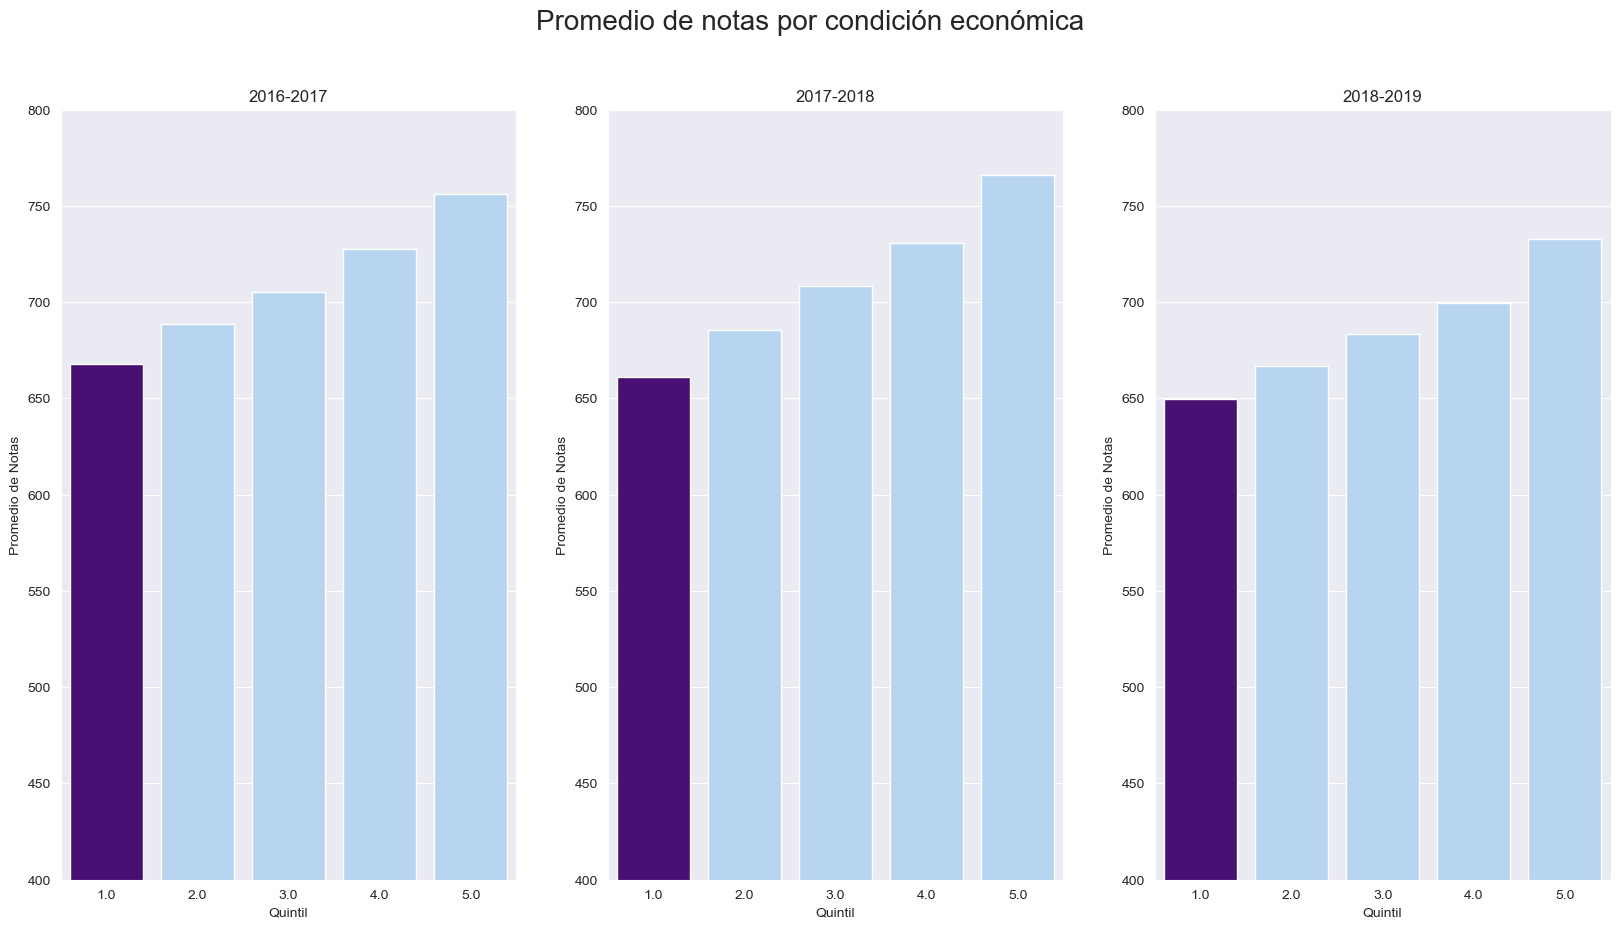

In [112]:
sns.set_style('darkgrid')
fig,axs = plt.subplots(1, 3, figsize=(20, 10))
sns.barplot(data=df_quintil_16, x="quintil", y="pes", ax=axs[0], palette=['Indigo', '#ADD5FA', '#ADD5FA', '#ADD5FA', '#ADD5FA'])
sns.barplot(data=df_quintil_17, x="quintil", y="pes", ax=axs[1], palette=['Indigo', '#ADD5FA', '#ADD5FA', '#ADD5FA', '#ADD5FA'])
sns.barplot(data=df_quintil_18, x="quintil", y="pes", ax=axs[2], palette=['Indigo', '#ADD5FA', '#ADD5FA', '#ADD5FA', '#ADD5FA'])
axs[0].set_ylim(400, 800)
axs[1].set_ylim(400, 800)
axs[2].set_ylim(400, 800)
axs[0].set_title('2016-2017')
axs[1].set_title('2017-2018')
axs[2].set_title('2018-2019')
axs[0].set_ylabel('Promedio de Notas')
axs[0].set_xlabel('Quintil')
axs[1].set_ylabel('Promedio de Notas')
axs[1].set_xlabel('Quintil')
axs[2].set_ylabel('Promedio de Notas')
axs[2].set_xlabel('Quintil')
plt.suptitle('Promedio de notas por condición económica', fontsize=20)

In [113]:
df_cantones['DPA_CANTON'] = df_cantones['DPA_CANTON'].astype('int')

In [114]:
df_groupby_16 = gdf_amie_16.groupby('id_cant')['pes'].mean().reset_index(drop=False)

In [115]:
df_colegio_canton = df_cantones.merge(df_groupby_16, left_on='DPA_CANTON', right_on='id_cant', how='left')

In [116]:
dfht_16 = gpd.GeoDataFrame(df_colegio_canton, geometry='geometry')

In [117]:
dfht_16.dropna(inplace=True)

In [118]:
dfht_16.to_file('../Output/ShapeFiles/colegios_canton.geojson', driver='GeoJSON')

c:\Users\luisr\anaconda3\envs\conda_is_love\lib\site-packages\geopandas\io\file.py:299: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [119]:
centroid=dfht_16.geometry.centroid
mapbox_api_key = r"pk.eyJ1Ijoic3RhbWVuIiwiYSI6IlpkZEtuS1EifQ.jiH_c9ShtBwtqH9RdG40mw"; tileset_ID_str = "streets-v11"; tilesize_pixels = "256";
m=folium.Map(location=[centroid.y.mean(), centroid.x.mean()], zoom_start=12,
             tiles = f"https://api.mapbox.com/styles/v1/mapbox/{tileset_ID_str}/tiles/{tilesize_pixels}/{{z}}/{{x}}/{{y}}@2x?access_token={mapbox_api_key}",
             attr='MAPBOX')

C:\Users\luisr\AppData\Local\Temp\ipykernel_40852\2975443265.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid=dfht_16.geometry.centroid


In [120]:
field = "pes"
label = "Notas promedio por canton, 2016-2017"
colormap = branca.colormap.linear.RdYlGn_09.to_step(7).scale(dfht_16[field].min(), dfht_16[field].max())
colormap.caption = label
layer = folium.GeoJson('../Output/ShapeFiles/colegios_canton.geojson',
        name=label,
        style_function=lambda x: {"weight":2, 'color':'black','fillColor':colormap(x['properties'][field]), 'fillOpacity':1},
        highlight_function=lambda x: {'weight':5, 'color':'black'},
        smooth_factor=2.0,
        tooltip=folium.features.GeoJsonTooltip(fields=['DPA_CANTON',field],
                                      aliases=['DPA_CANTON',label], 
                                      labels=True, 
                                      sticky=True,
                                      localize=True
                                     ),
        show = True,
        overlay = True
        )
m.add_child(layer)
m.add_child(colormap)
m.save('../Output/ShapeFiles/colegio_canton.html')

In [121]:
df_groupby_17 = gdf_amie.groupby('id_cant')['pes'].mean().reset_index(drop=False)
df_colegio_canton_17 = df_cantones.merge(df_groupby_17, left_on='DPA_CANTON', right_on='id_cant', how='left')
dfht_17 = gpd.GeoDataFrame(df_colegio_canton_17, geometry='geometry')
dfht_17.dropna(inplace=True)
dfht_17.to_file('../Output/ShapeFiles/colegios_canton_17.geojson', driver='GeoJSON')

c:\Users\luisr\anaconda3\envs\conda_is_love\lib\site-packages\geopandas\io\file.py:299: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [122]:
centroid=dfht_17.geometry.centroid
mapbox_api_key = r"pk.eyJ1Ijoic3RhbWVuIiwiYSI6IlpkZEtuS1EifQ.jiH_c9ShtBwtqH9RdG40mw"; tileset_ID_str = "streets-v11"; tilesize_pixels = "256";
m=folium.Map(location=[centroid.y.mean(), centroid.x.mean()], zoom_start=12,
             tiles = f"https://api.mapbox.com/styles/v1/mapbox/{tileset_ID_str}/tiles/{tilesize_pixels}/{{z}}/{{x}}/{{y}}@2x?access_token={mapbox_api_key}",
             attr='MAPBOX')

C:\Users\luisr\AppData\Local\Temp\ipykernel_40852\2558854523.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid=dfht_17.geometry.centroid


In [123]:
field = "pes"
label = "Notas promedio por canton, 2017-2018"
colormap = branca.colormap.linear.RdYlGn_09.to_step(7).scale(dfht_17[field].min(), dfht_17[field].max())
colormap.caption = label
layer = folium.GeoJson('../Output/ShapeFiles/colegios_canton_17.geojson',
        name=label,
        style_function=lambda x: {"weight":2, 'color':'black','fillColor':colormap(x['properties'][field]), 'fillOpacity':1},
        highlight_function=lambda x: {'weight':5, 'color':'black'},
        smooth_factor=2.0,
        tooltip=folium.features.GeoJsonTooltip(fields=['DPA_CANTON',field],
                                      aliases=['DPA_CANTON',label], 
                                      labels=True, 
                                      sticky=True,
                                      localize=True
                                     ),
        show = True,
        overlay = True
        )
m.add_child(layer)
m.add_child(colormap)
m.save('../Output/ShapeFiles/colegio_canton_17.html')

In [124]:
df_groupby_18 = gdf_amie_18.groupby('id_cant')['pes'].mean().reset_index(drop=False)
df_colegio_canton_18 = df_cantones.merge(df_groupby_18, left_on='DPA_CANTON', right_on='id_cant', how='left')
dfht_18 = gpd.GeoDataFrame(df_colegio_canton_18, geometry='geometry')
dfht_18.dropna(inplace=True)
dfht_18.to_file('../Output/ShapeFiles/colegios_canton_18.geojson', driver='GeoJSON')

c:\Users\luisr\anaconda3\envs\conda_is_love\lib\site-packages\geopandas\io\file.py:299: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [125]:
centroid=dfht_18.geometry.centroid
mapbox_api_key = r"pk.eyJ1Ijoic3RhbWVuIiwiYSI6IlpkZEtuS1EifQ.jiH_c9ShtBwtqH9RdG40mw"; tileset_ID_str = "streets-v11"; tilesize_pixels = "256";
m=folium.Map(location=[centroid.y.mean(), centroid.x.mean()], zoom_start=12,
             tiles = f"https://api.mapbox.com/styles/v1/mapbox/{tileset_ID_str}/tiles/{tilesize_pixels}/{{z}}/{{x}}/{{y}}@2x?access_token={mapbox_api_key}",
             attr='MAPBOX')

C:\Users\luisr\AppData\Local\Temp\ipykernel_40852\3351079417.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid=dfht_18.geometry.centroid


In [126]:
field = "pes"
label = "Notas promedio por canton, 2018-2019"
colormap = branca.colormap.linear.RdYlGn_09.to_step(7).scale(dfht_18[field].min(), dfht_18[field].max())
colormap.caption = label
layer = folium.GeoJson('../Output/ShapeFiles/colegios_canton_18.geojson',
        name=label,
        style_function=lambda x: {"weight":2, 'color':'black','fillColor':colormap(x['properties'][field]), 'fillOpacity':1},
        highlight_function=lambda x: {'weight':5, 'color':'black'},
        smooth_factor=2.0,
        tooltip=folium.features.GeoJsonTooltip(fields=['DPA_CANTON',field],
                                      aliases=['DPA_CANTON',label], 
                                      labels=True, 
                                      sticky=True,
                                      localize=True
                                     ),
        show = True,
        overlay = True
        )
m.add_child(layer)
m.add_child(colormap)
m.save('../Output/ShapeFiles/colegio_canton_18.html')

In [127]:
df_ratio_16 = df_registers_16.merge(df_sede, left_on='Codigo_Institucion', right_on='sede', how='right')
df_ratio_17 = df_registers_17.merge(df_sede, left_on='Codigo_Institucion', right_on='sede', how='right')
df_ratio_18 = df_registers_18.merge(df_sede, left_on='Codigo_Institucion', right_on='sede', how='right')
df_ratio = pd.concat([df_ratio_16, df_ratio_17, df_ratio_18])

In [128]:
df_ratio['ratio'] = df_ratio['Total_Estudiantes'] / df_ratio['Total_Docentes']

C:\Users\luisr\AppData\Local\Temp\ipykernel_40852\295899693.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_ratio['ratio'] = df_ratio['Total_Estudiantes'] / df_ratio['Total_Docentes']


In [129]:
df_ratio = df_ratio.loc[:, ['Periodo', 'Codigo_Institucion', 'Sostenimiento', 'Area', 'ratio']]

In [130]:
df_general_ratio = df_general.loc[:, ['ciclo', 'amie', 'pes']]

In [131]:
df_ratio.dropna(subset=['ratio'], inplace=True)

In [132]:
df_ratio_pes = df_general_ratio.merge(df_ratio, left_on='amie', right_on='Codigo_Institucion', how='left')

In [133]:
df_pes_ratio = df_ratio_pes.groupby(['Periodo', 'Sostenimiento', 'Area'])['pes'].mean().reset_index(drop=False)

In [134]:
df_pes_ratio = df_pes_ratio[(df_pes_ratio['Sostenimiento'] == 'Fiscal') | (df_pes_ratio['Sostenimiento'] == 'Fiscomisional')]

In [135]:
df_ratio_groupby = df_ratio.groupby(['Periodo', 'Sostenimiento', 'Area'])['ratio'].mean().reset_index(drop=False)

In [136]:
df_ratio_groupby = df_ratio_groupby[(df_ratio_groupby['Sostenimiento'] == 'Fiscal') | (df_ratio_groupby['Sostenimiento'] == 'Fiscomisional')]

Text(0.5, 0.98, 'Promedio de notas en base al ratio Estudiantes/Docentes')

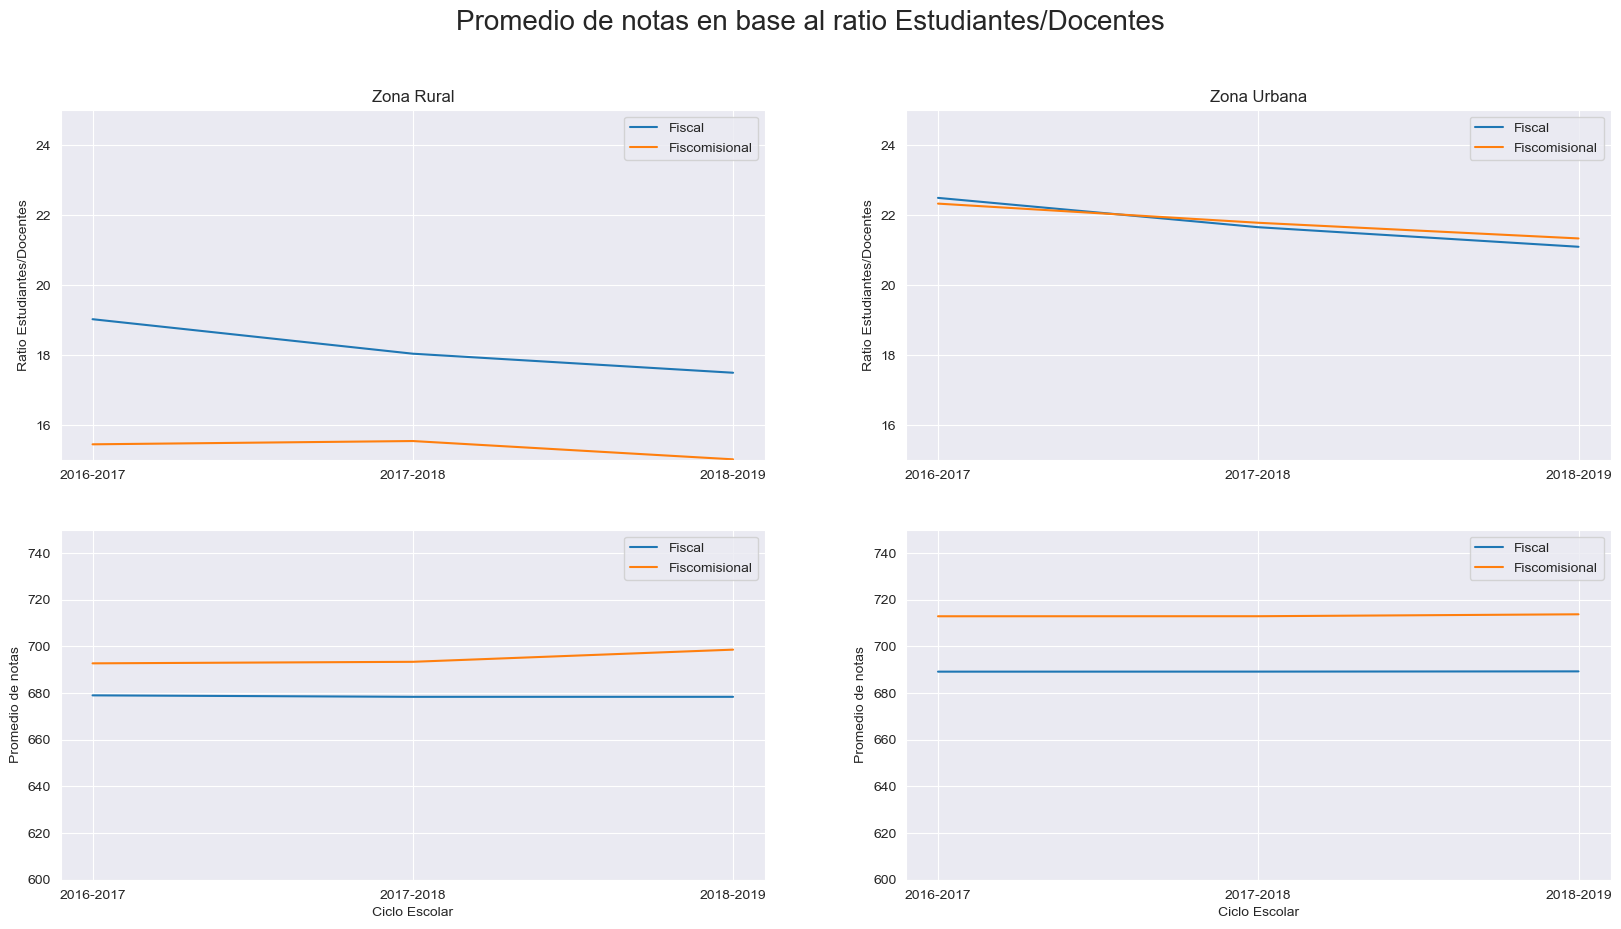

In [137]:
sns.set_style('darkgrid')
fig,axs = plt.subplots(2, 2, figsize=(20,10))
sns.lineplot(data=df_ratio_groupby[(df_ratio_groupby['Sostenimiento'] == 'Fiscal') & (df_ratio_groupby['Area'] == 'RuralINEC')], x='Periodo', y='ratio', ax=axs[0, 0], label='Fiscal')
sns.lineplot(data=df_pes_ratio[(df_pes_ratio['Sostenimiento'] == 'Fiscal') & (df_pes_ratio['Area'] == 'RuralINEC')], x='Periodo', y='pes', ax=axs[1, 0], label='Fiscal')
sns.lineplot(data=df_ratio_groupby[(df_ratio_groupby['Sostenimiento'] == 'Fiscomisional') & (df_ratio_groupby['Area'] == 'RuralINEC')], x='Periodo', y='ratio', ax=axs[0, 0], label='Fiscomisional')
sns.lineplot(data=df_pes_ratio[(df_pes_ratio['Sostenimiento'] == 'Fiscomisional') & (df_pes_ratio['Area'] == 'RuralINEC')], x='Periodo', y='pes', ax=axs[1, 0], label='Fiscomisional')
sns.lineplot(data=df_ratio_groupby[(df_ratio_groupby['Sostenimiento'] == 'Fiscal') & (df_ratio_groupby['Area'] == 'UrbanaINEC')], x='Periodo', y='ratio', ax=axs[0, 1], label='Fiscal')
sns.lineplot(data=df_pes_ratio[(df_pes_ratio['Sostenimiento'] == 'Fiscal') & (df_pes_ratio['Area'] == 'UrbanaINEC')], x='Periodo', y='pes', ax=axs[1, 1], label='Fiscal')
sns.lineplot(data=df_ratio_groupby[(df_ratio_groupby['Sostenimiento'] == 'Fiscomisional') & (df_ratio_groupby['Area'] == 'UrbanaINEC')], x='Periodo', y='ratio', ax=axs[0, 1], label='Fiscomisional')
sns.lineplot(data=df_pes_ratio[(df_pes_ratio['Sostenimiento'] == 'Fiscomisional') & (df_pes_ratio['Area'] == 'UrbanaINEC')], x='Periodo', y='pes', ax=axs[1, 1], label='Fiscomisional')
axs[0, 0].set_ylim(15, 25)
axs[0, 1].set_ylim(15, 25)
axs[1, 0].set_ylim(600, 750)
axs[1, 1].set_ylim(600, 750)
axs[0, 0].set_title('Zona Rural')
axs[0, 1].set_title('Zona Urbana')
axs[0, 0].set_ylabel('Ratio Estudiantes/Docentes')
axs[0, 0].set_xlabel('')
axs[0, 1].set_ylabel('Ratio Estudiantes/Docentes')
axs[0, 1].set_xlabel('')
axs[1, 0].set_ylabel('Promedio de notas')
axs[1, 1].set_ylabel('Promedio de notas')
axs[1, 0].set_xlabel('Ciclo Escolar')
axs[1, 1].set_xlabel('Ciclo Escolar')
plt.suptitle('Promedio de notas en base al ratio Estudiantes/Docentes', fontsize=20)

In [138]:
df_outliers_16 = gdf_amie_16[gdf_amie_16['pes'] >= 400]
df_outliers_17 = gdf_amie[gdf_amie['pes'] >= 400]
df_outliers_18 = gdf_amie_18[gdf_amie_18['pes'] >= 400]

In [139]:
df_outliers_16['imat'] = df_outliers_16['imat'].str.replace(',', '.').astype('float')
df_outliers_16['ilyl'] = df_outliers_16['ilyl'].str.replace(',', '.').astype('float')
df_outliers_16['icn'] = df_outliers_16['icn'].str.replace(',', '.').astype('float')
df_outliers_16['ies'] = df_outliers_16['ies'].str.replace(',', '.').astype('float')
df_outliers_17['imat'] = df_outliers_17['imat'].str.replace(',', '.').astype('float')
df_outliers_17['ilyl'] = df_outliers_17['ilyl'].str.replace(',', '.').astype('float')
df_outliers_17['icn'] = df_outliers_17['icn'].str.replace(',', '.').astype('float')
df_outliers_17['ies'] = df_outliers_17['ies'].str.replace(',', '.').astype('float')
df_outliers_18['imat'] = df_outliers_18['imat'].str.replace(',', '.').astype('float')
df_outliers_18['ilyl'] = df_outliers_18['ilyl'].str.replace(',', '.').astype('float')
df_outliers_18['icn'] = df_outliers_18['icn'].str.replace(',', '.').astype('float')
df_outliers_18['ies'] = df_outliers_18['ies'].str.replace(',', '.').astype('float')

c:\Users\luisr\anaconda3\envs\conda_is_love\lib\site-packages\geopandas\geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [140]:
dfht_subject_16 = pd.pivot_table(data=df_outliers_16, index='id_prov', values=['imat', 'ilyl', 'icn', 'ies'], aggfunc='mean')
dfht_subject_17 = pd.pivot_table(data=df_outliers_17, index='id_prov', values=['imat', 'ilyl', 'icn', 'ies'], aggfunc='mean')
dfht_subject_18 = pd.pivot_table(data=df_outliers_18, index='id_prov', values=['imat', 'ilyl', 'icn', 'ies'], aggfunc='mean')

In [141]:
materias = ['Ciencias', 'Sociales', 'Lenguaje', 'Matemáticas']
provincias = ['Azuay', 'Bolívar', 'Cañar', 'Carchi', 'Chimborazo', 'Cotopaxi', 'El Oro', 'Esmeraldas', 'Galápagos', 'Guayas', 'Imbabura', 'Loja', 'Los Ríos', 'Manabí', 'Morona Santiago', 'Napo', 'Orellana', 'Pastaza', 'Pichincha', 'Santa Elena', 'Santo Domingo', 'Sucumbíos', 'Tungurahua', 'Zamora Chinchipe', 'Zona Indefinida']

In [142]:
dfht_subject_16.columns = materias
dfht_subject_17.columns = materias
dfht_subject_18.columns = materias
dfht_subject_16.index = provincias
dfht_subject_17.index = provincias
dfht_subject_18.index = provincias

Text(0.5, 0.98, 'Promedio de calificaciones por materia y provincia')

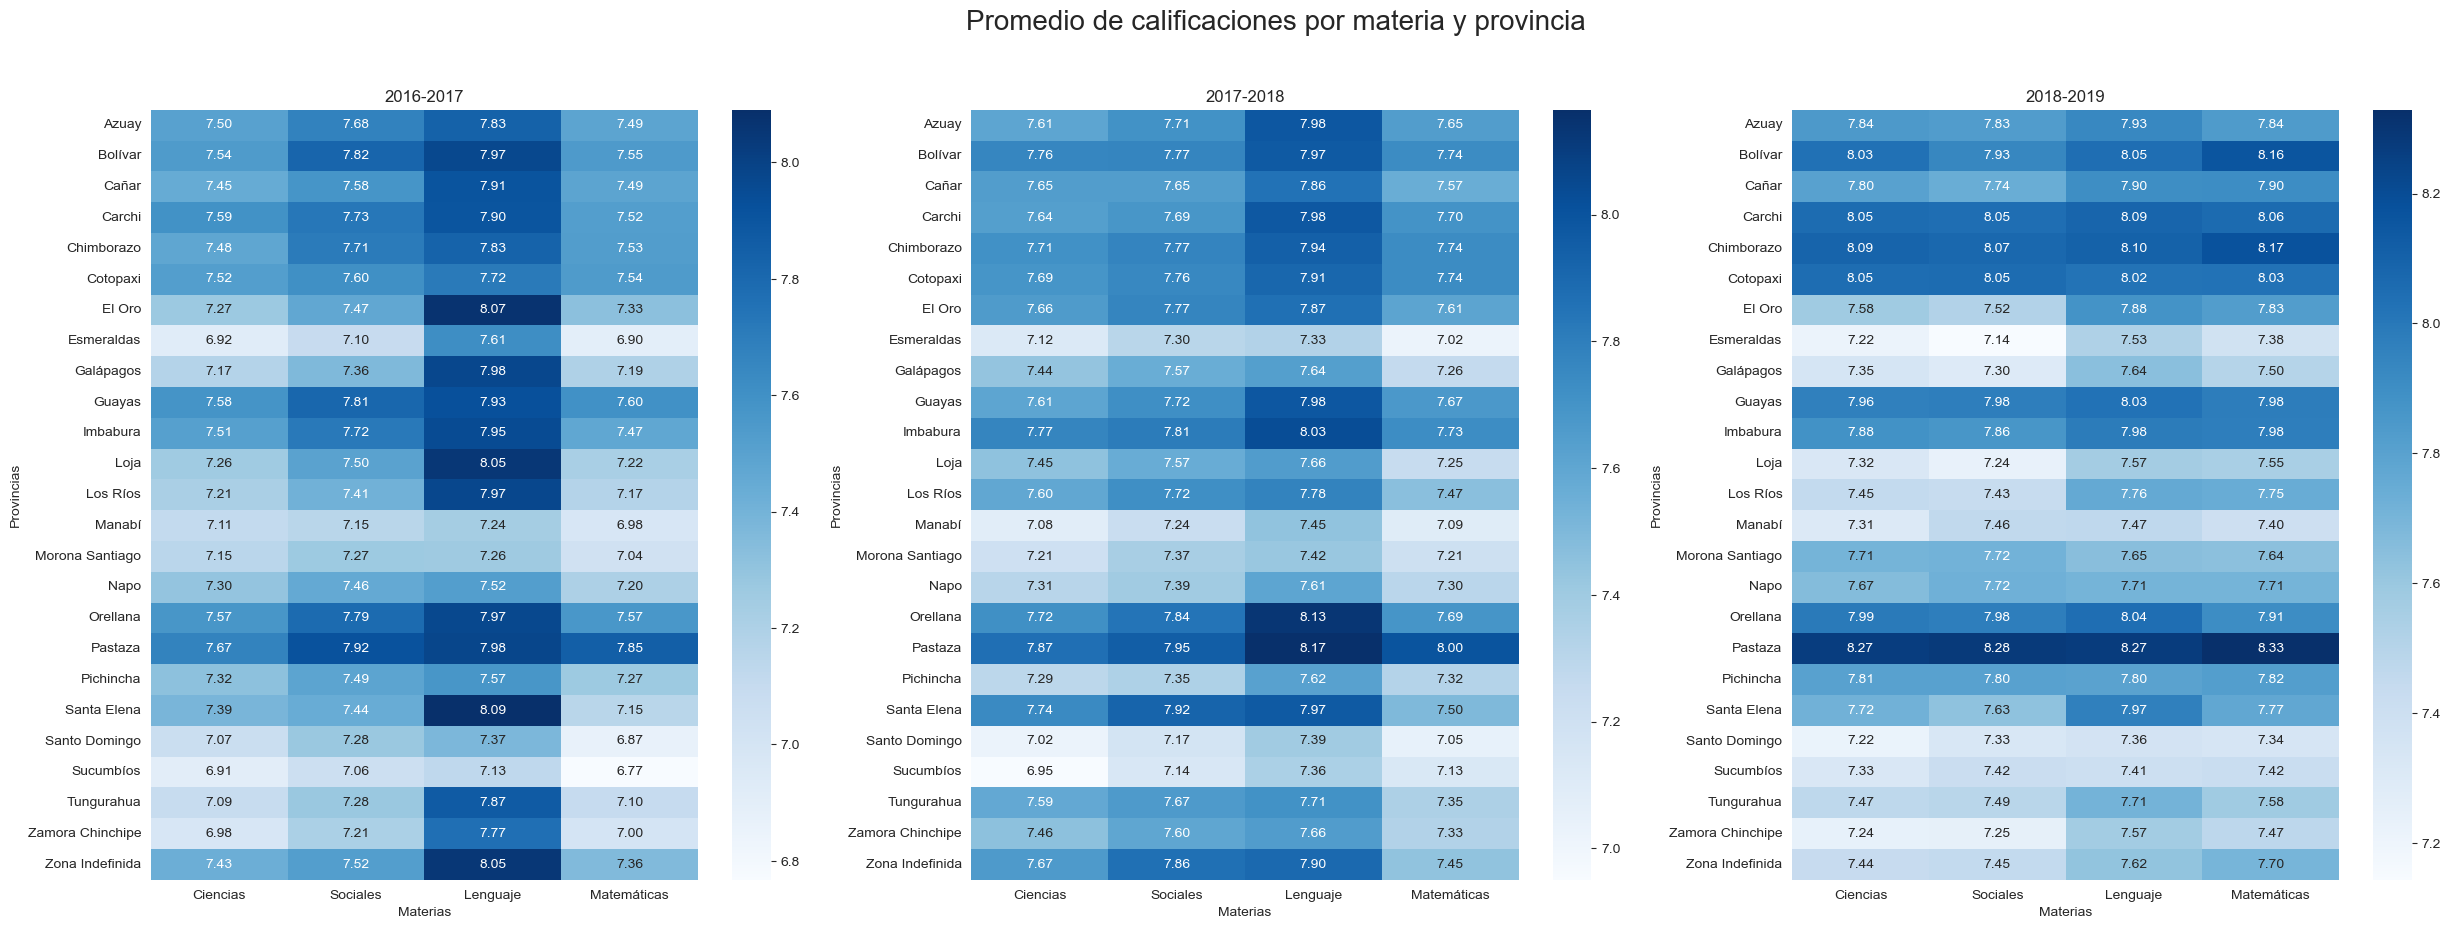

In [143]:
sns.set_style('darkgrid')
fig,axs = plt.subplots(1, 3, figsize=(30,10))
sns.heatmap(dfht_subject_16, ax=axs[0], cmap='Blues', annot=True, fmt='.2f')
sns.heatmap(dfht_subject_17, ax=axs[1], cmap='Blues', annot=True, fmt='.2f')
sns.heatmap(dfht_subject_18, ax=axs[2], cmap='Blues', annot=True, fmt='.2f')
axs[0].set_title('2016-2017')
axs[1].set_title('2017-2018')
axs[2].set_title('2018-2019')
axs[0].set_ylabel('Provincias')
axs[0].set_xlabel('Materias')
axs[1].set_ylabel('Provincias')
axs[1].set_xlabel('Materias')
axs[2].set_ylabel('Provincias')
axs[2].set_xlabel('Materias')
plt.suptitle('Promedio de calificaciones por materia y provincia', fontsize=20)

In [144]:
#df_groupby_general = df_outliers.groupby('amie')['pes'].mean().reset_index(drop=False)
#df_flood_general = gdf_amie_16.merge(df_groupby_general, on='amie', how='left')
#df_flood_general.dropna(subset=['pes_y'], inplace=True)
df_flood_general = gpd.GeoDataFrame(df_outliers, geometry='geometry')
df_flood_general.crs = df_floods.crs
dfht_flood_general = gpd.sjoin(df_floods, df_flood_general, how='left', op='intersects')

In [145]:
dfht_flood_general = dfht_flood_general.loc[:, ['ciclo', 'pes', 'susce_inun', 'geometry']]
dfht_flood_general.dropna(subset=['pes'], inplace=True)

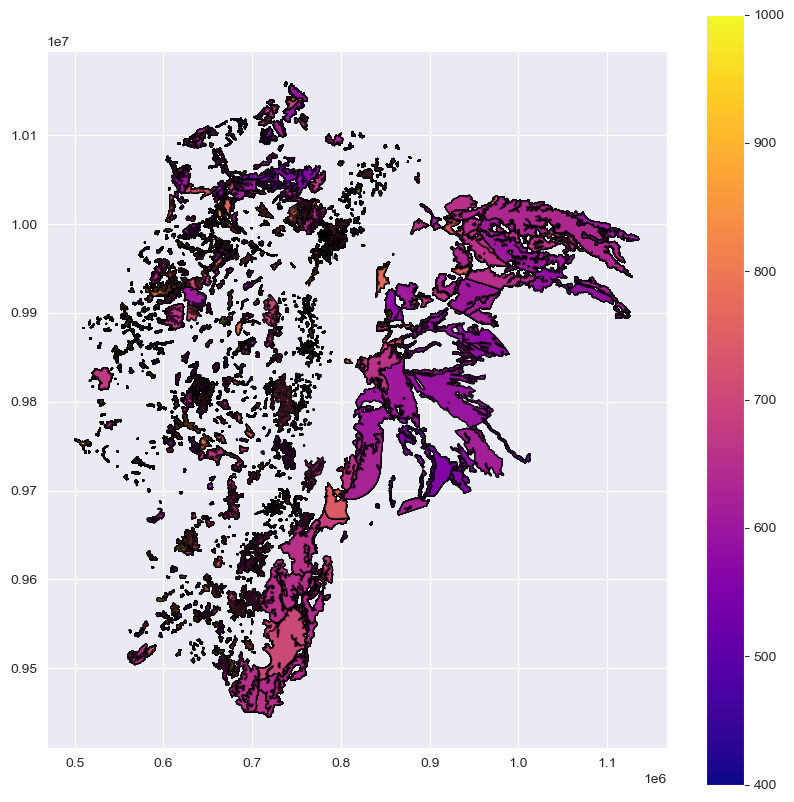

In [146]:
ax = dfht_flood_general.plot(figsize=(10, 10), alpha=0.5, cmap='plasma', column='pes', legend=True, edgecolor='k')
#cx.add_basemap(ax, crs=dfht_flood_general.crs, source=cx.providers.Stamen.TonerLite)

In [147]:
df_test_17 = df_test_17[df_test_17['pes'] >= 400]
df_test_18 = df_test_18[df_test_18['pes'] >= 400]

In [148]:
df_test_16['imat'] = df_test_16['imat'].str.replace(',', '.').astype('float')
df_test_17['imat'] = df_test_17['imat'].str.replace(',', '.').astype('float')
df_test_18['imat'] = df_test_18['imat'].str.replace(',', '.').astype('float')

In [149]:
df_repetidor_test_16 = df_test_16[df_test_16['repetidor'] == True]['pes'].reset_index(drop=True)
df_repetidor_test_17 = df_test_17[df_test_17['repetidor'] == True]['pes'].reset_index(drop=True)
df_repetidor_test_18 = df_test_18[df_test_18['repetidor'] == True]['pes'].reset_index(drop=True)

In [150]:
df_no_repetidor_test_16 = df_test_16[df_test_16['repetidor'] == False]['pes'].reset_index(drop=True)
df_no_repetidor_test_17 = df_test_17[df_test_17['repetidor'] == False]['pes'].reset_index(drop=True)
df_no_repetidor_test_18 = df_test_18[df_test_18['repetidor'] == False]['pes'].reset_index(drop=True)

C:\Users\luisr\AppData\Local\Temp\ipykernel_40852\169141733.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_repetidor_test_16, ax=axs[0], kde=True, hist=False, label='Repetidor')
C:\Users\luisr\AppData\Local\Temp\ipykernel_40852\169141733.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5

Text(0.5, 0.98, 'Distribución de puntajes de examen por repetidores y no repetidores')

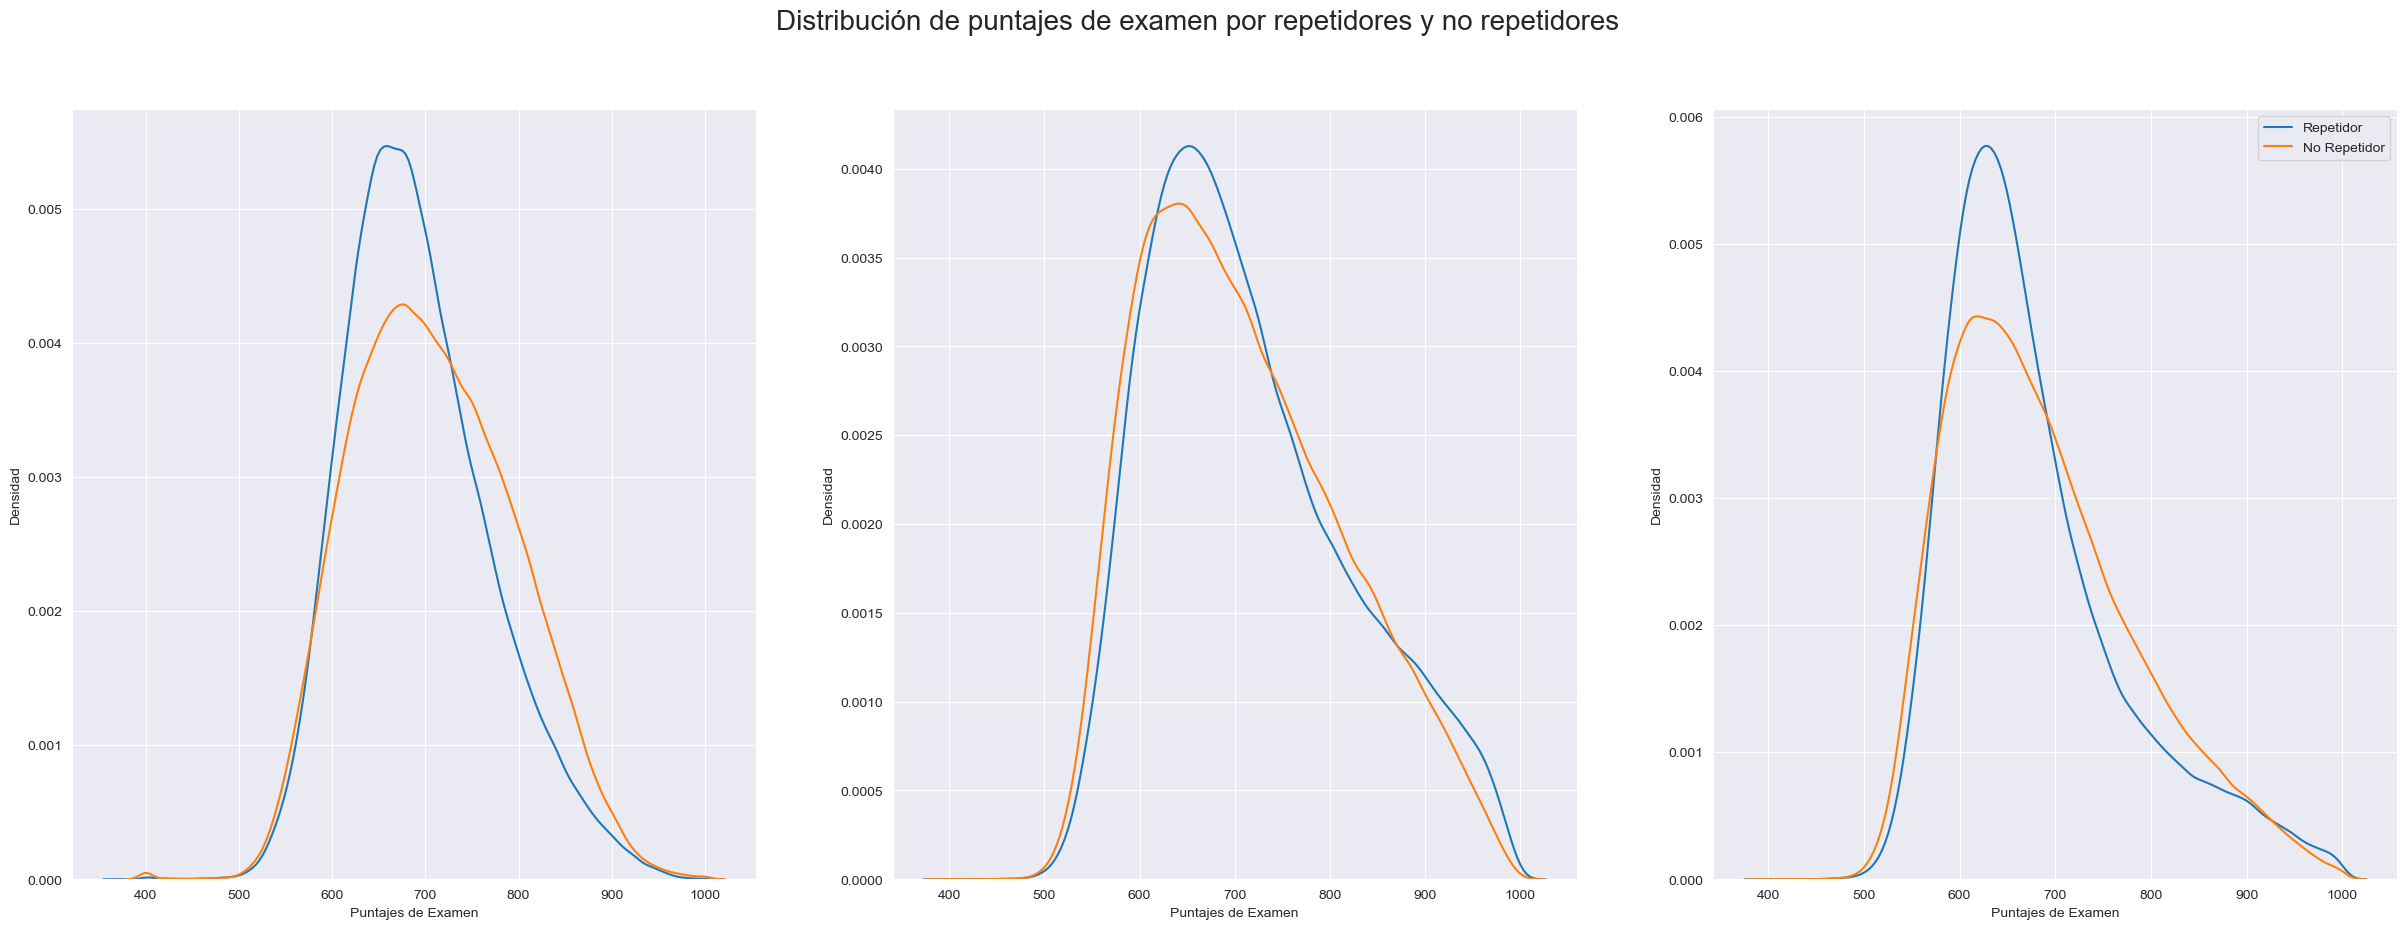

In [151]:
sns.set_style('darkgrid')
fig,axs = plt.subplots(1, 3, figsize=(30,10))
sns.distplot(df_repetidor_test_16, ax=axs[0], kde=True, hist=False, label='Repetidor')
sns.distplot(df_no_repetidor_test_16, ax=axs[0], kde=True, hist=False, label='No Repetidor')
sns.distplot(df_repetidor_test_17, ax=axs[1], kde=True, hist=False, label='Repetidor')
sns.distplot(df_no_repetidor_test_17, ax=axs[1], kde=True, hist=False, label='No Repetidor')
sns.distplot(df_repetidor_test_18, ax=axs[2], kde=True, hist=False, label='Repetidor')
sns.distplot(df_no_repetidor_test_18, ax=axs[2], kde=True, hist=False, label='No Repetidor')
plt.legend()
axs[0].set_xlabel('Puntajes de Examen')
axs[0].set_ylabel('Densidad')
axs[1].set_xlabel('Puntajes de Examen')
axs[1].set_ylabel('Densidad')
axs[2].set_xlabel('Puntajes de Examen')
axs[2].set_ylabel('Densidad')
plt.suptitle('Distribución de puntajes de examen por repetidores y no repetidores', fontsize=20)

In [153]:
df_outliers_16 = gdf_amie_16[gdf_amie_16['pes'] >= 400]
df_outliers_17 = gdf_amie[gdf_amie['pes'] >= 400]
df_outliers_18 = gdf_amie_18[gdf_amie_18['pes'] >= 400]

In [154]:
df_outliers_16['imat'] = df_outliers_16['imat'].str.replace(',', '.').astype('float')
df_outliers_16['ilyl'] = df_outliers_16['ilyl'].str.replace(',', '.').astype('float')
df_outliers_16['icn'] = df_outliers_16['icn'].str.replace(',', '.').astype('float')
df_outliers_16['ies'] = df_outliers_16['ies'].str.replace(',', '.').astype('float')

c:\Users\luisr\anaconda3\envs\conda_is_love\lib\site-packages\geopandas\geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [155]:
df_outliers_17['imat'] = df_outliers_17['imat'].str.replace(',', '.').astype('float')
df_outliers_17['ilyl'] = df_outliers_17['ilyl'].str.replace(',', '.').astype('float')
df_outliers_17['icn'] = df_outliers_17['icn'].str.replace(',', '.').astype('float')
df_outliers_17['ies'] = df_outliers_17['ies'].str.replace(',', '.').astype('float')

In [156]:
df_outliers_18['imat'] = df_outliers_18['imat'].str.replace(',', '.').astype('float')
df_outliers_18['ilyl'] = df_outliers_18['ilyl'].str.replace(',', '.').astype('float')
df_outliers_18['icn'] = df_outliers_18['icn'].str.replace(',', '.').astype('float')
df_outliers_18['ies'] = df_outliers_18['ies'].str.replace(',', '.').astype('float')

In [157]:
dfht_subject_16 = pd.pivot_table(data=df_outliers_16, index='id_prov', values=['imat', 'ilyl', 'icn', 'ies'], aggfunc='mean')
dfht_subject_17 = pd.pivot_table(data=df_outliers_17, index='id_prov', values=['imat', 'ilyl', 'icn', 'ies'], aggfunc='mean')
dfht_subject_18 = pd.pivot_table(data=df_outliers_18, index='id_prov', values=['imat', 'ilyl', 'icn', 'ies'], aggfunc='mean')

<AxesSubplot:ylabel='id_prov'>

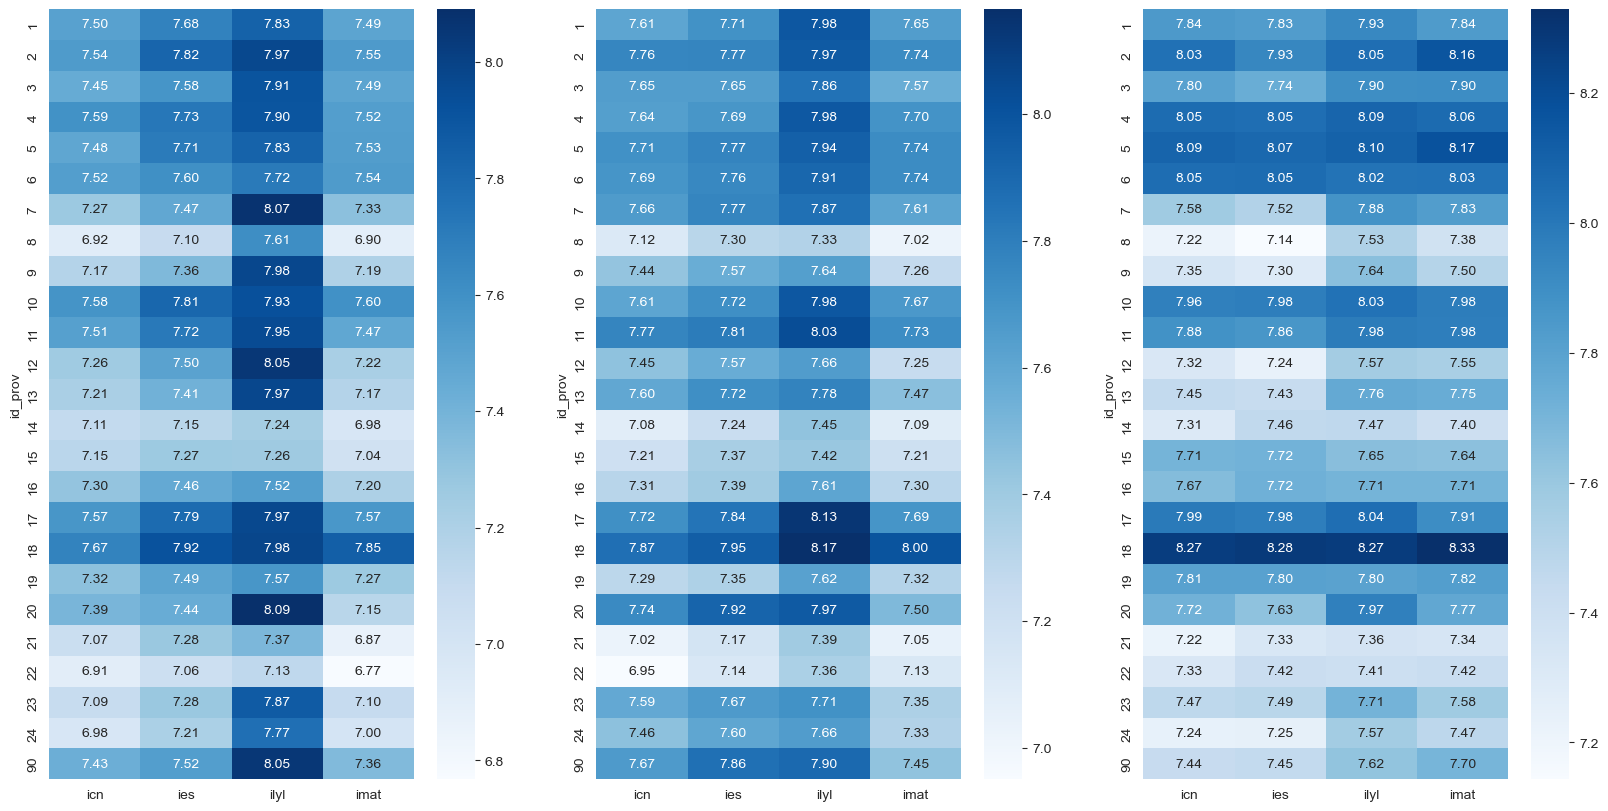

In [158]:
sns.set_style('darkgrid')
fig,axs = plt.subplots(1, 3, figsize=(20,10))
sns.heatmap(dfht_subject_16, ax=axs[0], cmap='Blues', annot=True, fmt='.2f')
sns.heatmap(dfht_subject_17, ax=axs[1], cmap='Blues', annot=True, fmt='.2f')
sns.heatmap(dfht_subject_18, ax=axs[2], cmap='Blues', annot=True, fmt='.2f')


In [160]:
df_eficiencia

,amie,eficiencia,categoria
0,13H01217,0.595350,BAJA
1,12H00217,0.907862,MEDIA ALTA
2,17H00763,0.887716,MEDIA ALTA
3,06H00419,0.693645,BAJA
4,09H00169,0.916382,MEDIA ALTA
...,...,...,...
495,07H00727,0.828868,MEDIA BAJA
496,17H02979,0.247990,BAJA
497,09H02775,0.950952,ALTA
498,05H00077,0.871089,MEDIA ALTA


In [163]:
df_prediction = pd.merge(df_eficiencia, df_outliers, on='amie', how='inner')

In [164]:
df_prediction.shape

(144164, 371)

In [167]:
df_prediction.columns

Index(['amie', 'eficiencia', 'categoria', 'codigo', 'ciclo', 'nm_regi',
       'es_regeva', 'id_zona', 'id_dist', 'id_circ',
       ...
       'geometry', 'ecivbbe', 'etniebe', 'gdiscbe', 'inacfbe', 'injhbbe',
       'ncelabe', 'nmpcabe', 'ocstbbe', 'tdiscbe'],
      dtype='object', length=371)

In [168]:
df_prediction["discriminacion"]=0
df_prediction["discriminacion"][(df_prediction["dicsabe"]==3) | (df_prediction["dicsabe"]==4) | (df_prediction["didsabe"]==3) | (df_prediction["didsabe"]==4) | (df_prediction["diecabe"]==3) | (df_prediction["diecabe"]==4) | (df_prediction["dietabe"]==3) | (df_prediction["dietabe"]==4) | (df_prediction["dirfabe"]==3) | (df_prediction["dirfabe"]==4)]=1

C:\Users\luisr\AppData\Local\Temp\ipykernel_40852\2500363522.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prediction["discriminacion"][(df_prediction["dicsabe"]==3) | (df_prediction["dicsabe"]==4) | (df_prediction["didsabe"]==3) | (df_prediction["didsabe"]==4) | (df_prediction["diecabe"]==3) | (df_prediction["diecabe"]==4) | (df_prediction["dietabe"]==3) | (df_prediction["dietabe"]==4) | (df_prediction["dirfabe"]==3) | (df_prediction["dirfabe"]==4)]=1


In [237]:
df_new_register_16 = df_registers_16[['Total_Estudiantes', 'Total_Docentes', 'Codigo_Institucion']]
df_new_register_17 = df_registers_17[['Total_Estudiantes', 'Total_Docentes', 'Codigo_Institucion']]
df_new_register_18 = df_registers_18[['Total_Estudiantes', 'Total_Docentes', 'Codigo_Institucion']]

In [238]:
temp = pd.concat([df_new_register_16, df_new_register_17, df_new_register_18])

In [239]:
df_new_registers = pd.merge(temp, df_prediction, left_on='Codigo_Institucion', right_on='amie', how='inner')

In [257]:
df_prediction_1 = df_new_registers[['inev', 'id_prov', 'repetidor', 'discriminacion', 'tp_sexo', 'discapacidad', 'quintil', 'tp_sost', 'categoria', 'Total_Estudiantes', 'Total_Docentes']]

In [269]:
df_prediction_1['ratio'] = df_prediction_1['Total_Estudiantes'] / df_prediction_1['Total_Docentes']

C:\Users\luisr\AppData\Local\Temp\ipykernel_40852\2415813630.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prediction_1['ratio'] = df_prediction_1['Total_Estudiantes'] / df_prediction_1['Total_Docentes']


In [270]:
df_prediction_1.dropna(inplace=True)

C:\Users\luisr\AppData\Local\Temp\ipykernel_40852\3437169306.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prediction_1.dropna(inplace=True)


In [272]:
#df_prediction_1['inev'] = df_prediction_1['inev'].str.replace(',', '.').astype('float')
#df_prediction_1['imat'] = df_prediction_1['imat'].str.replace(',', '.').astype('float')
#df_prediction_1['ilyl'] = df_prediction_1['ilyl'].str.replace(',', '.').astype('float')
#df_prediction_1['icn'] = df_prediction_1['icn'].str.replace(',', '.').astype('float')
#df_prediction_1['ies'] = df_prediction_1['ies'].str.replace(',', '.').astype('float')

In [273]:
df_prediction_1['id_prov'] = df_prediction_1['id_prov'].astype('object')
df_prediction_1['tp_sexo'] = df_prediction_1['tp_sexo'].astype('object')
df_prediction_1['discapacidad'] = df_prediction_1['discapacidad'].astype('object')
df_prediction_1['quintil'] = df_prediction_1['quintil'].astype('object')
df_prediction_1['tp_sost'] = df_prediction_1['tp_sost'].astype('object')

C:\Users\luisr\AppData\Local\Temp\ipykernel_40852\3392739354.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prediction_1['id_prov'] = df_prediction_1['id_prov'].astype('object')
C:\Users\luisr\AppData\Local\Temp\ipykernel_40852\3392739354.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prediction_1['tp_sexo'] = df_prediction_1['tp_sexo'].astype('object')
C:\Users\luisr\AppData\Local\Temp\ipykernel_40852\3392739354.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

In [282]:
x = df_prediction_1.drop(['categoria', 'Total_Estudiantes', 'Total_Docentes'], axis=1)

In [283]:
y = df_prediction_1['categoria']

In [284]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [285]:
df_prediction_1.dtypes

inev                 float64
id_prov               object
repetidor               bool
discriminacion         int64
tp_sexo               object
discapacidad          object
quintil               object
tp_sost               object
categoria             object
Total_Estudiantes      int64
Total_Docentes         int64
ratio                float64
dtype: object

In [286]:
rf = RandomForestClassifier(criterion='entropy', random_state=32).fit(x_train, y_train)

In [287]:
scores = cross_val_score(rf, x_train, y_train, cv=5)

In [288]:
scores.mean()

0.9801116234482146

In [289]:
confusion_matrix(y_test, rf.predict(x_test))

array([[54196,    18,    88,    74],
       [   90,  5831,    84,    98],
       [  364,    33, 16949,    62],
       [  264,    59,   221,  8065]], dtype=int64)

In [330]:
#Plotea la matriz de confusión
import itertools


def plot_confusion_matrix(cm, classes,
                            normalize=False,
                            title='Confusion matrix',
                            cmap=plt.cm.Blues):
        """
        Esta función imprime y plotea la matriz de confusión.
        La normalización puede ser aplicada estableciendo `normalize=True`.
        """
        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            print("Matriz de confusión normalizada")
        else:
            print('Matriz de confusión, sin normalización')
    
        print(cm)
    
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)
    
        fmt = '.2f' if normalize else 'd'
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    
        plt.tight_layout()
        plt.ylabel('Etiqueta verdadera')
        plt.xlabel('Etiqueta predicha')

Matriz de confusión, sin normalización
[[54196    18    88    74]
 [   90  5831    84    98]
 [  364    33 16949    62]
 [  264    59   221  8065]]


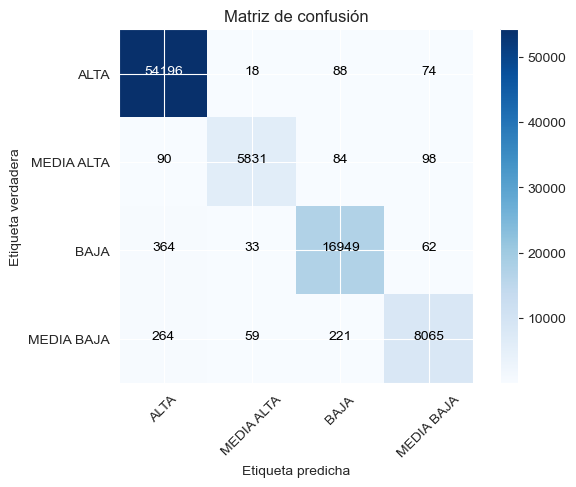

In [335]:
plot_confusion_matrix(confusion_matrix(y_test, rf.predict(x_test)), classes=['ALTA', 'MEDIA ALTA', 'BAJA', 'MEDIA BAJA'], title='Matriz de confusión')

In [290]:
recall_score(y_test, rf.predict(x_test), average='macro')

0.9656411495531754

In [303]:
df_clustering = df_prediction_1[['inev', 'id_prov', 'repetidor', 'discriminacion', 'tp_sexo', 'discapacidad', 'quintil', 'tp_sost', 'Total_Estudiantes', 'Total_Docentes']]

In [304]:
vector=np.arange(1,11)

In [305]:
inercias=[]
for k in vector:
    kmeans=KMeans(n_clusters=k,random_state=0)
    kmeans.fit(df_clustering)
    inercias.append(kmeans.inertia_)

In [306]:
dfg = pd.DataFrame({'k' : vector, 'inercias': inercias})

<AxesSubplot:xlabel='k', ylabel='inercias'>

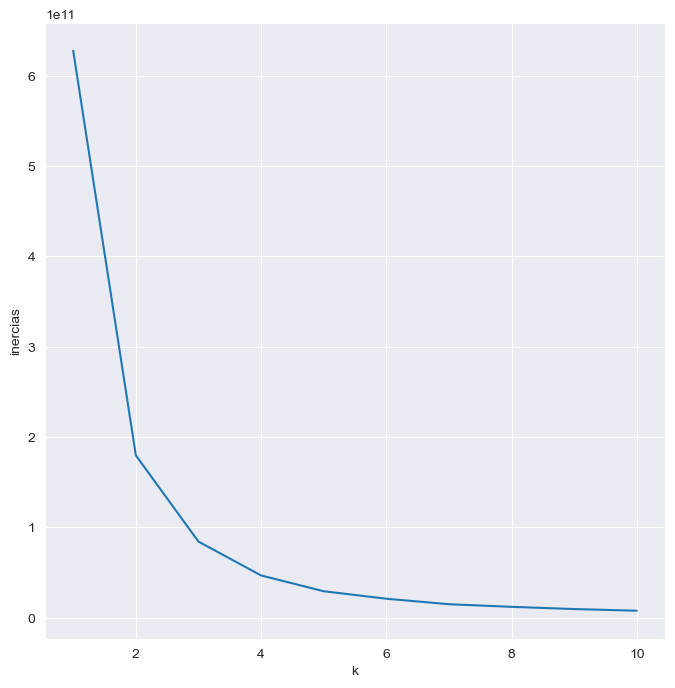

In [315]:
fig, ax = plt.subplots(figsize=(8,8))
sns.lineplot(data=dfg, x='k', y='inercias', markers='o')

In [308]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(df_clustering)

KMeans(n_clusters=3, random_state=0)

In [309]:
df_clustering['cluster'] = kmeans.labels_

C:\Users\luisr\AppData\Local\Temp\ipykernel_40852\2259999109.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clustering['cluster'] = kmeans.labels_


<AxesSubplot:xlabel='cluster', ylabel='inev'>

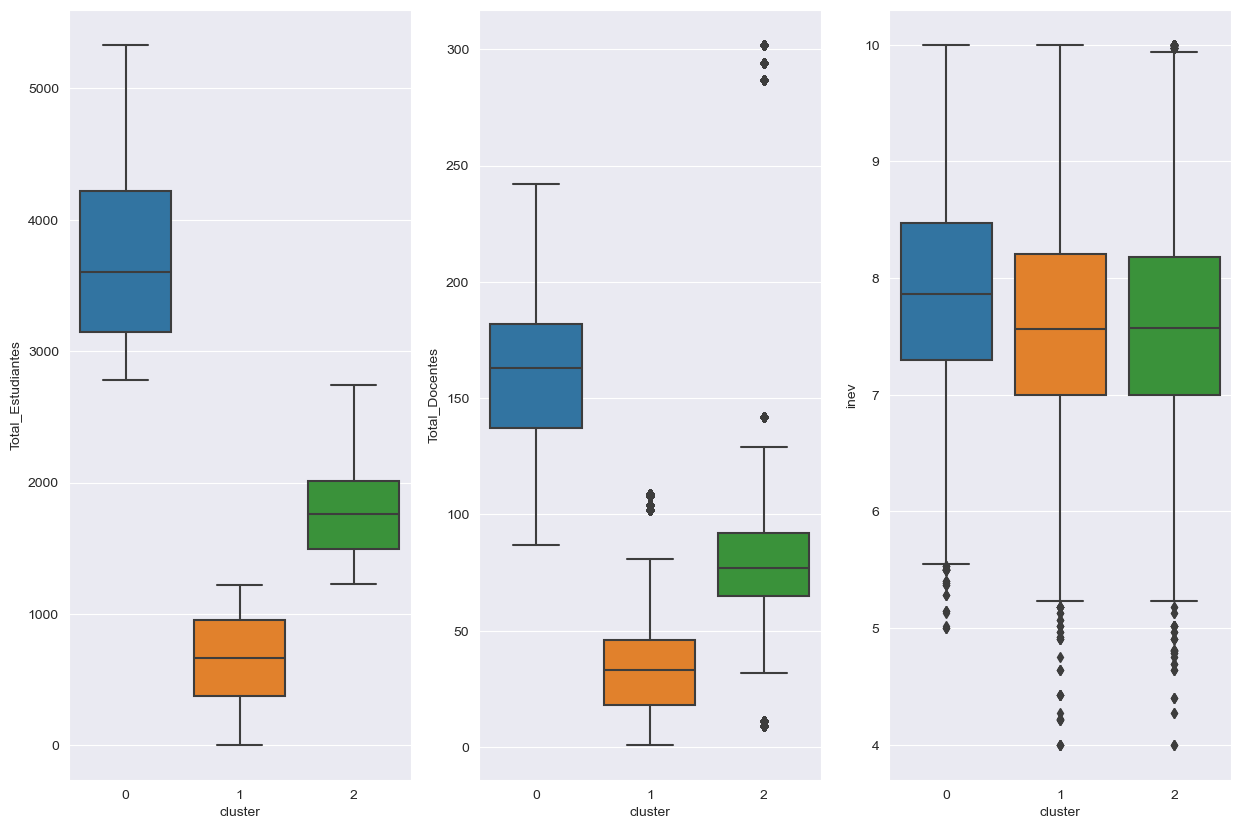

In [323]:
fig, ax = plt.subplots(1, 3, figsize=(15,10))
sns.boxplot(data=df_clustering, x='cluster', y='Total_Estudiantes', ax=ax[0])
sns.boxplot(data=df_clustering, x='cluster', y='Total_Docentes', ax=ax[1])
sns.boxplot(data=df_clustering, x='cluster', y='inev', ax=ax[2])
ax[0].set_title('Total Estudiantes por cluster')
ax[1].set_title('Total Docentes por cluster')
ax[2].set_title('Inev por cluster')
ax[0].set_ylabel('Total Estudiantes')
ax[1].set_ylabel('Total Docentes')
ax[2].set_ylabel('Inev')

In [405]:
df_new_clustering = df_new_registers[['inev', 'discriminacion', 'tp_sexo', 'tp_sost', 'Total_Estudiantes', 'Total_Docentes', 'eficiencia']]

In [406]:
df_new_clustering = df_new_clustering[df_new_clustering['eficiencia'] > 0.5]

In [407]:
df_new_clustering['inev'] = df_new_clustering['inev'].str.replace(',', '.').astype('float')

In [417]:
df_new_clustering['eficiencia'].unique()

array([0.90896964, 0.94566625, 0.93461466, 0.95545256, 0.85364205,
       0.77346301, 0.95118427, 0.93228686, 0.94277477, 0.91451937,
       0.92728543, 0.90589792, 0.77429676, 0.90348446, 0.64685673,
       0.85817546, 0.7118758 , 0.82785696, 0.63223755, 0.91600507,
       0.92937887, 0.88323998, 0.81590462, 0.90663832, 0.86050808,
       0.70007074, 0.92896181, 0.75404239, 0.96028084, 0.85382581,
       0.62844968, 0.86917943, 0.82274592, 0.79055387, 0.81113946,
       0.92908156, 0.95423478, 0.7242099 , 0.91287309, 0.61592609,
       0.59446919, 0.94275773, 0.89680105, 0.68124878, 0.62651134,
       0.95640618, 0.94541526, 0.87470686, 0.82496619, 0.91617286,
       0.92996544, 0.89017874, 0.67600012, 0.85343397, 0.93258095,
       0.78350282, 0.77153647, 0.90119439, 0.87188292, 0.81609774,
       0.92562091, 0.78967655, 0.87108898, 0.95115709, 0.94418406,
       0.89561349, 0.76468158, 0.8615132 , 0.93803763, 0.78530169,
       0.69354033, 0.85601318, 0.82029223, 0.76544106, 0.97741

In [408]:
#df_new_clustering['imat'] = df_new_clustering['imat'].str.replace(',', '.').astype('float')
#df_new_clustering['ilyl'] = df_new_clustering['ilyl'].str.replace(',', '.').astype('float')
#df_new_clustering['icn'] = df_new_clustering['icn'].str.replace(',', '.').astype('float')
#df_new_clustering['ies'] = df_new_clustering['ies'].str.replace(',', '.').astype('float')

In [409]:
df_new_clustering.dropna(inplace=True)

In [410]:
inercias=[]
for k in vector:
    kmeans=KMeans(n_clusters=k,random_state=0)
    kmeans.fit(df_clustering)
    inercias.append(kmeans.inertia_)

In [411]:
dfg_1 = pd.DataFrame({'k' : vector, 'inercias': inercias})

<AxesSubplot:xlabel='k', ylabel='inercias'>

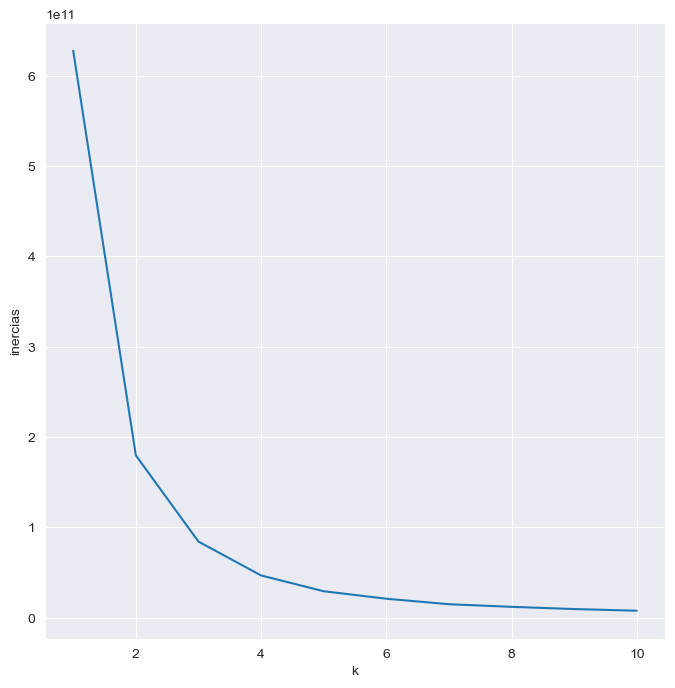

In [412]:
fig, ax = plt.subplots(figsize=(8,8))
sns.lineplot(data=dfg_1, x='k', y='inercias', markers='o')

In [413]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(df_new_clustering)

KMeans(n_clusters=3, random_state=0)

In [414]:
df_new_clustering['cluster'] = kmeans.labels_

In [415]:
#sns.pairplot(data=df_new_clustering, hue='cluster', palette='tab10')
#plt.suptitle('Pairplot de variables por cluster', y=1.05)

Text(0, 0.5, 'Eficiencia')

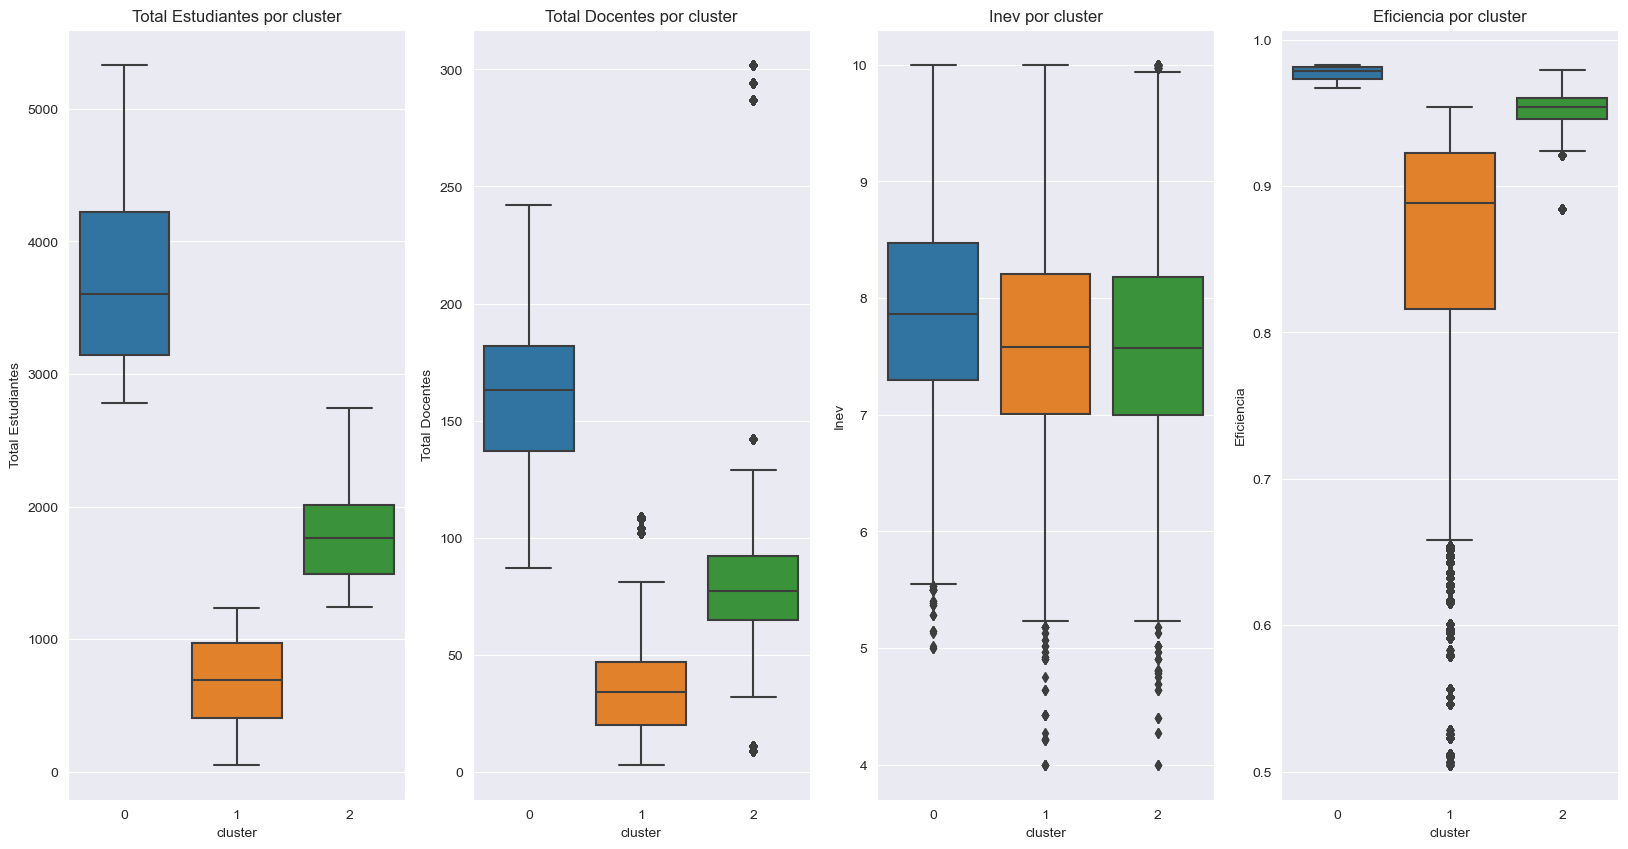

In [416]:
fig, ax = plt.subplots(1, 4, figsize=(20,10))
sns.boxplot(data=df_new_clustering, x='cluster', y='Total_Estudiantes', ax=ax[0])
sns.boxplot(data=df_new_clustering, x='cluster', y='Total_Docentes', ax=ax[1])
sns.boxplot(data=df_new_clustering, x='cluster', y='inev', ax=ax[2])
sns.boxplot(data=df_new_clustering, x='cluster', y='eficiencia', ax=ax[3])
ax[0].set_title('Total Estudiantes por cluster')
ax[1].set_title('Total Docentes por cluster')
ax[2].set_title('Inev por cluster')
ax[3].set_title('Eficiencia por cluster')
ax[0].set_ylabel('Total Estudiantes')
ax[1].set_ylabel('Total Docentes')
ax[2].set_ylabel('Inev')
ax[3].set_ylabel('Eficiencia')